# King County Housing with Multiple Linear Regression

### By: Eric Romano, Christian Moya

## Notebook 1: Data Preparation w/ Transformation Techniques

This notebook contains the process we used to prepare the dataframe for creating linear regression model. This process will include various techniques to transfrom our data. The purpose of this notebook is to show how and why these tranfromation techniques are used.
For a step-by-step process on how we compiled and scrubbed our data set look into the notebook titled 'Understanding_the_Data&Compiling_Dataset'.

In [1]:
# for webscraping
import os 
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time 
import sys
import numpy as np
import pandas as pd 
import regex as re 
import requests
import lxml
from lxml.html.soupparser import fromstring
import prettify
import numbers 
import htmltext

# for visuals using geopandas
from shapely.geometry import Point, Polygon 
import geopandas as gpd
import descartes
import haversine as hs
import folium

# for plotting 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from scipy.stats import gaussian_kde
from matplotlib.font_manager import FontProperties
from matplotlib.path import Path
from matplotlib.textpath import TextToPath
import tilemapbase
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
import adjustText as aT
import shapely.speedups
shapely.speedups.enable()

# for stats (min,max,mean)
import statistics
from numpy import mean
from numpy import std 

# statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


## Full dataset with all features

In [2]:
df = pd.read_csv('data_pred5')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 24 columns):
price                           18109 non-null float64
bathrooms                       18109 non-null float64
sqft_lot                        18109 non-null int64
sqft_living                     18109 non-null int64
waterfront                      18109 non-null float64
grade                           18109 non-null int64
zipcode                         18109 non-null int64
lat                             18109 non-null float64
long                            18109 non-null float64
district                        18109 non-null object
grades                          18109 non-null object
grade_rank                      18109 non-null int64
coor                            18109 non-null object
School_K_12                     18109 non-null float64
School_Junior_High_Middle       18109 non-null float64
School_Elementary               18109 non-null float64
dist_School_High        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249225BD5F8>,
      dtype=object)

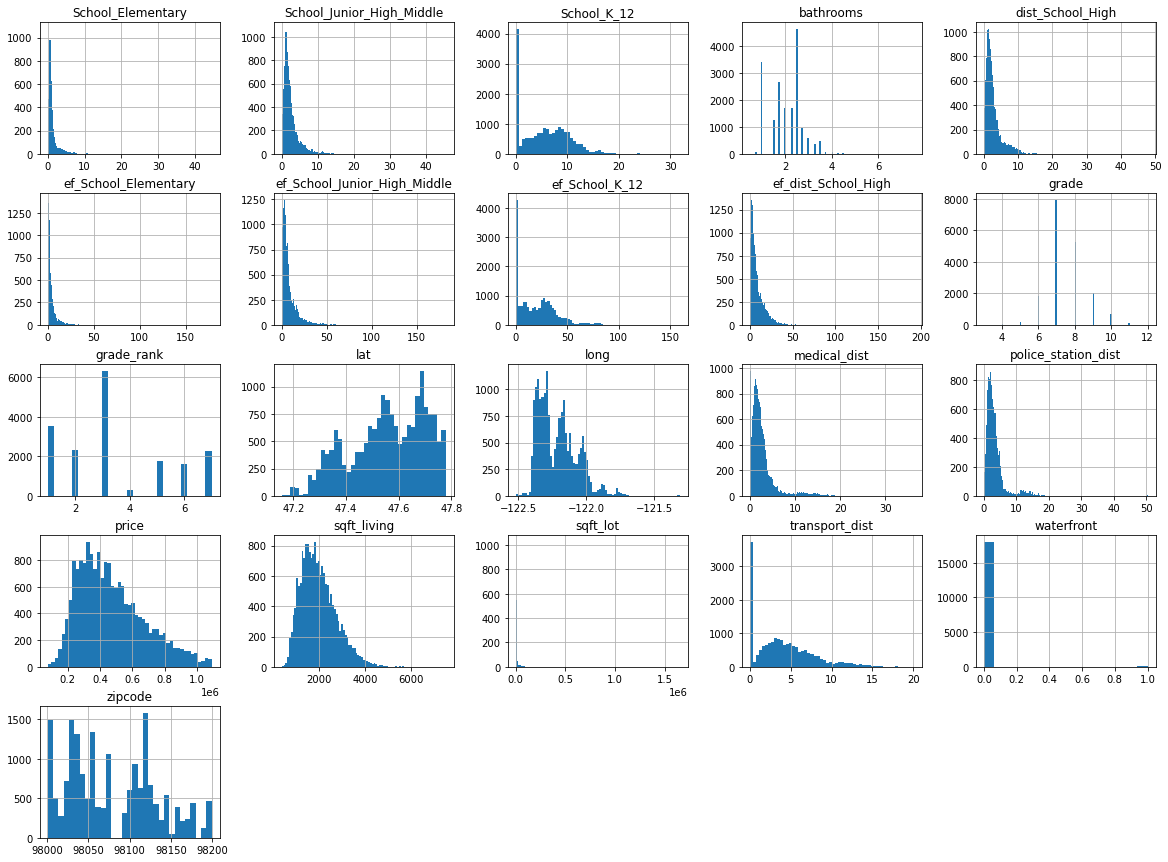

In [4]:
df.hist(figsize=(20,15), bins='auto')

In [5]:
['School_Junior_High_Middle','dist_School_High','ef_School_Junior_High_Middle','ef_dist_School_High','ef_School_Elementary','medical_dist','police_station_dist','sqft_living','sqft_lot']

['School_Junior_High_Middle',
 'dist_School_High',
 'ef_School_Junior_High_Middle',
 'ef_dist_School_High',
 'ef_School_Elementary',
 'medical_dist',
 'police_station_dist',
 'sqft_living',
 'sqft_lot']

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.7118749280305955
Kurtosis: -0.10538155361583268


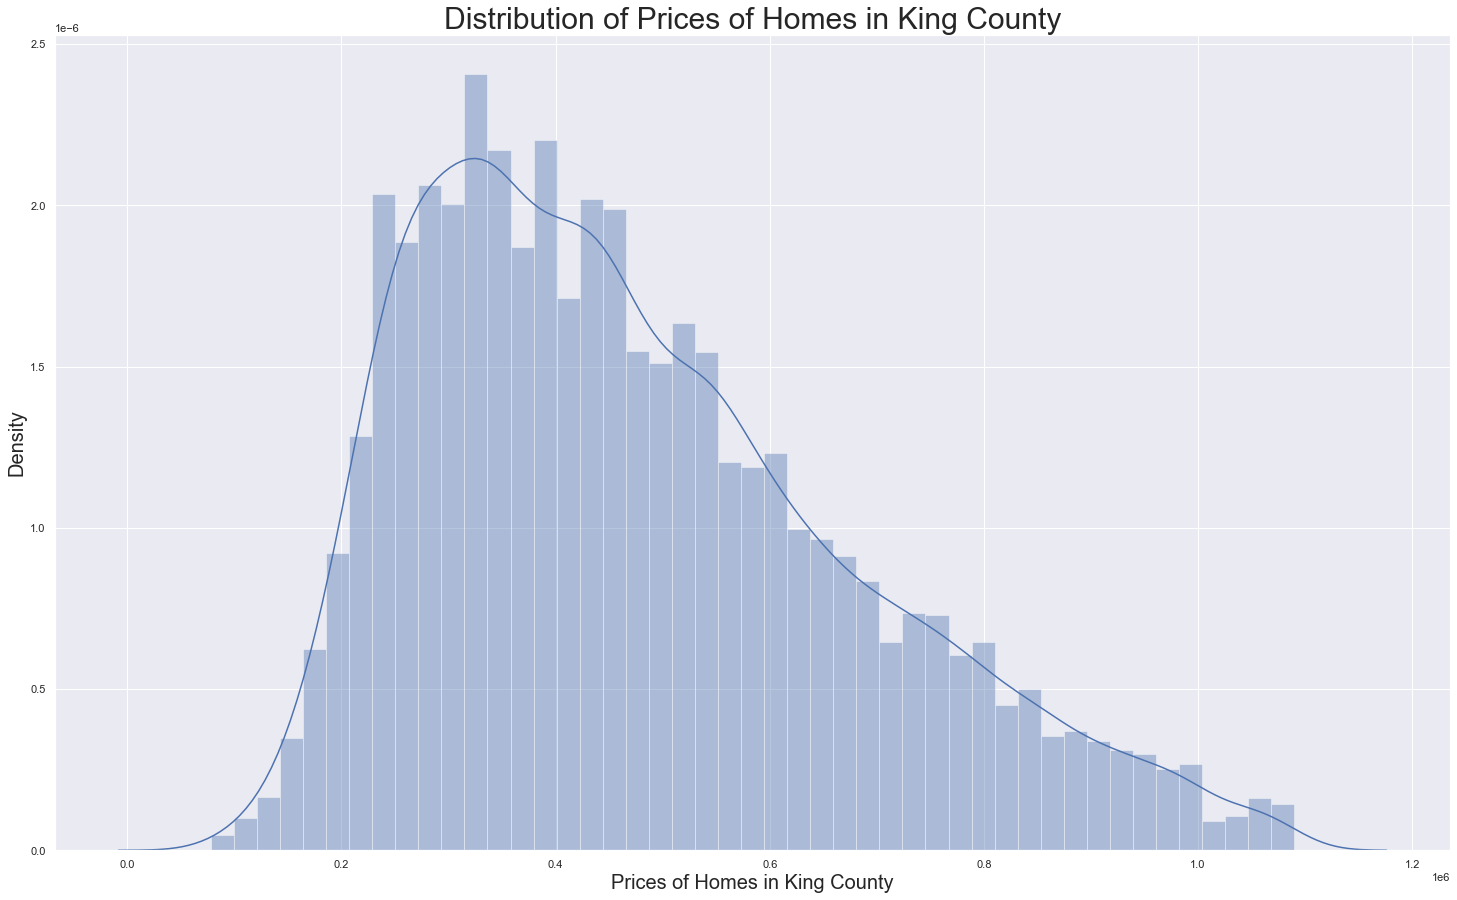

In [6]:
## I will first start off with transforming the price, I will all be adding these transformed features onto an empty df.
sns.set()
plt.figure(figsize=(25,15))
sns.distplot(df['price'])
plt.title('Distribution of Prices of Homes in King County', fontsize=30)
plt.xlabel('Prices of Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['price'].skew())
print('Kurtosis:', df['price'].kurt())

In [7]:
# Creating an empty df to add transformed features
df_norm = pd.DataFrame()

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.19628654291416453
Kurtosis: -0.3810820923590543


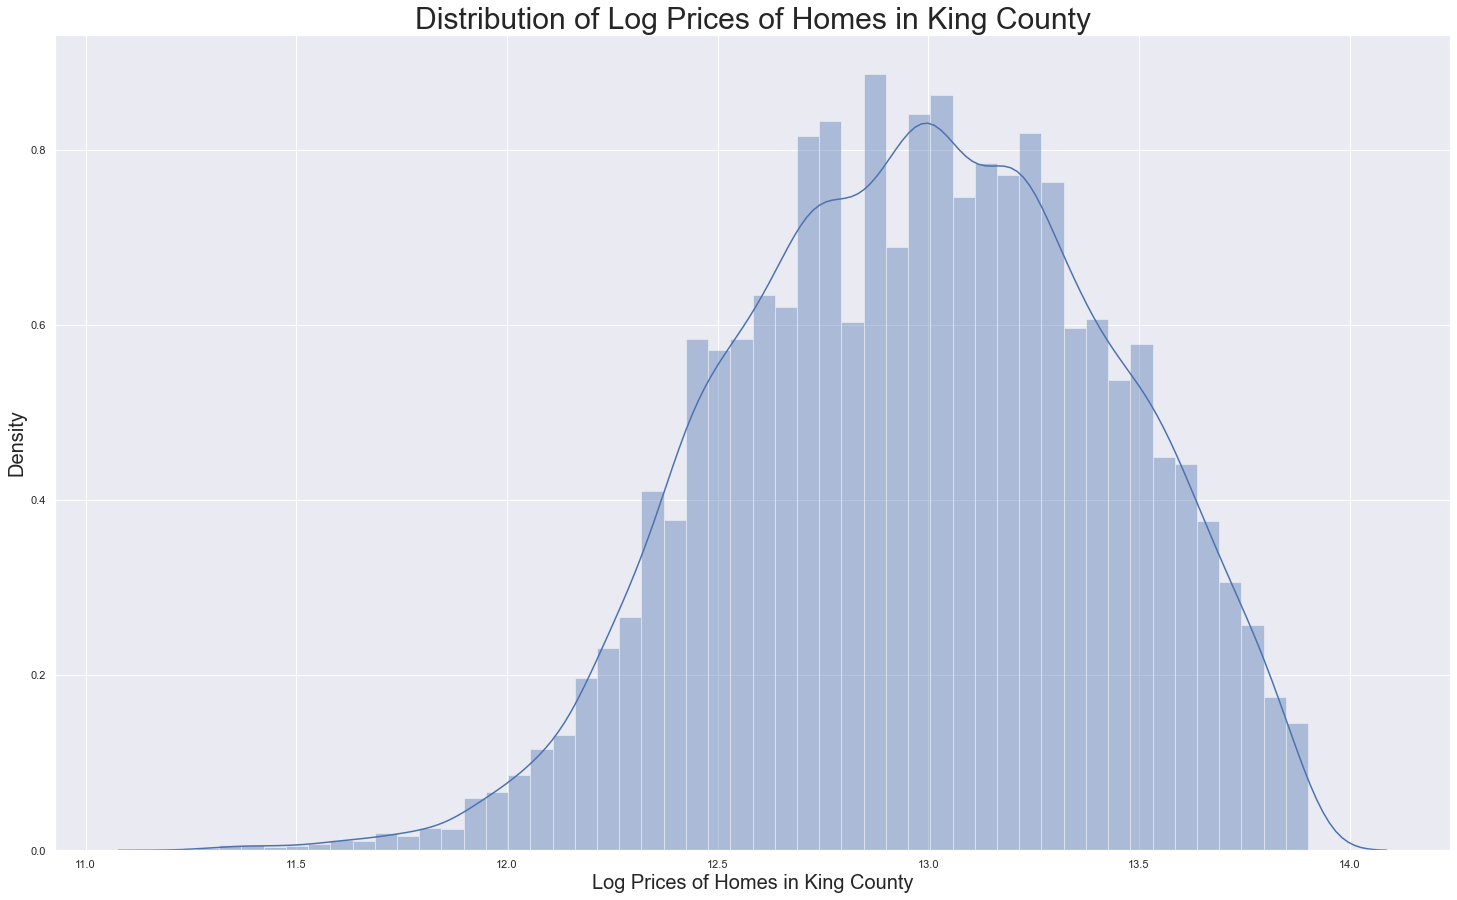

In [8]:
df_norm['log_price'] = df['price'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['log_price'])
plt.title('Distribution of Log Prices of Homes in King County', fontsize=30)
plt.xlabel('Log Prices of Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['log_price'].skew())
print('Kurtosis:', df_norm['log_price'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 9.498038122689858
Kurtosis: 176.8587909050857


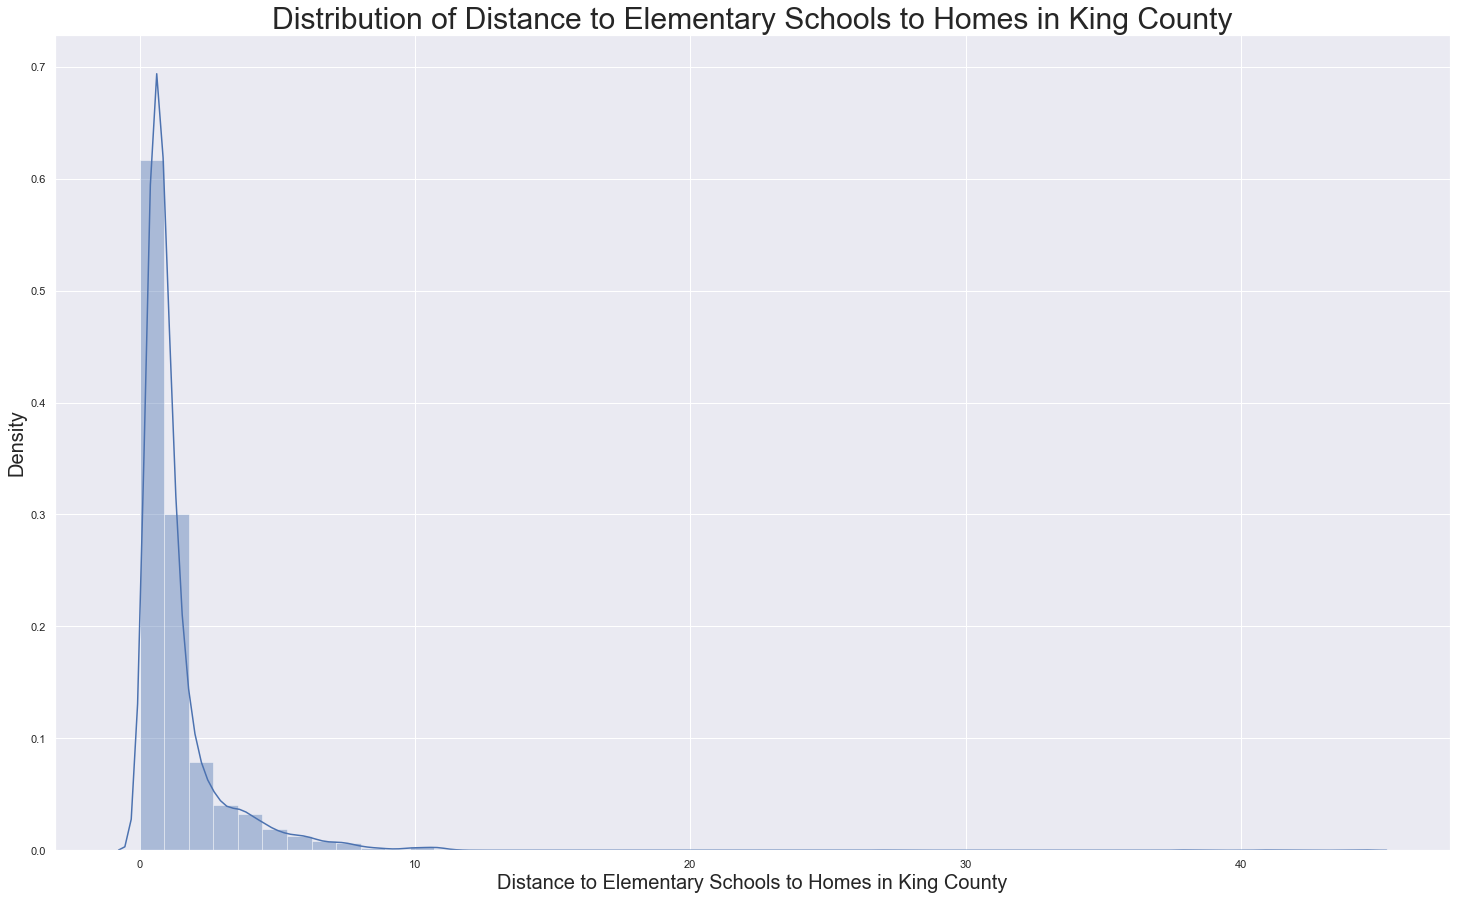

In [9]:
plt.figure(figsize=(25,15))
sns.distplot(df['School_Elementary'])
plt.title('Distribution of Distance to Elementary Schools to Homes in King County', fontsize=30)
plt.xlabel('Distance to Elementary Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['School_Elementary'].skew())
print('Kurtosis:', df['School_Elementary'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.33895851441057107
Kurtosis: 0.5101411600171275


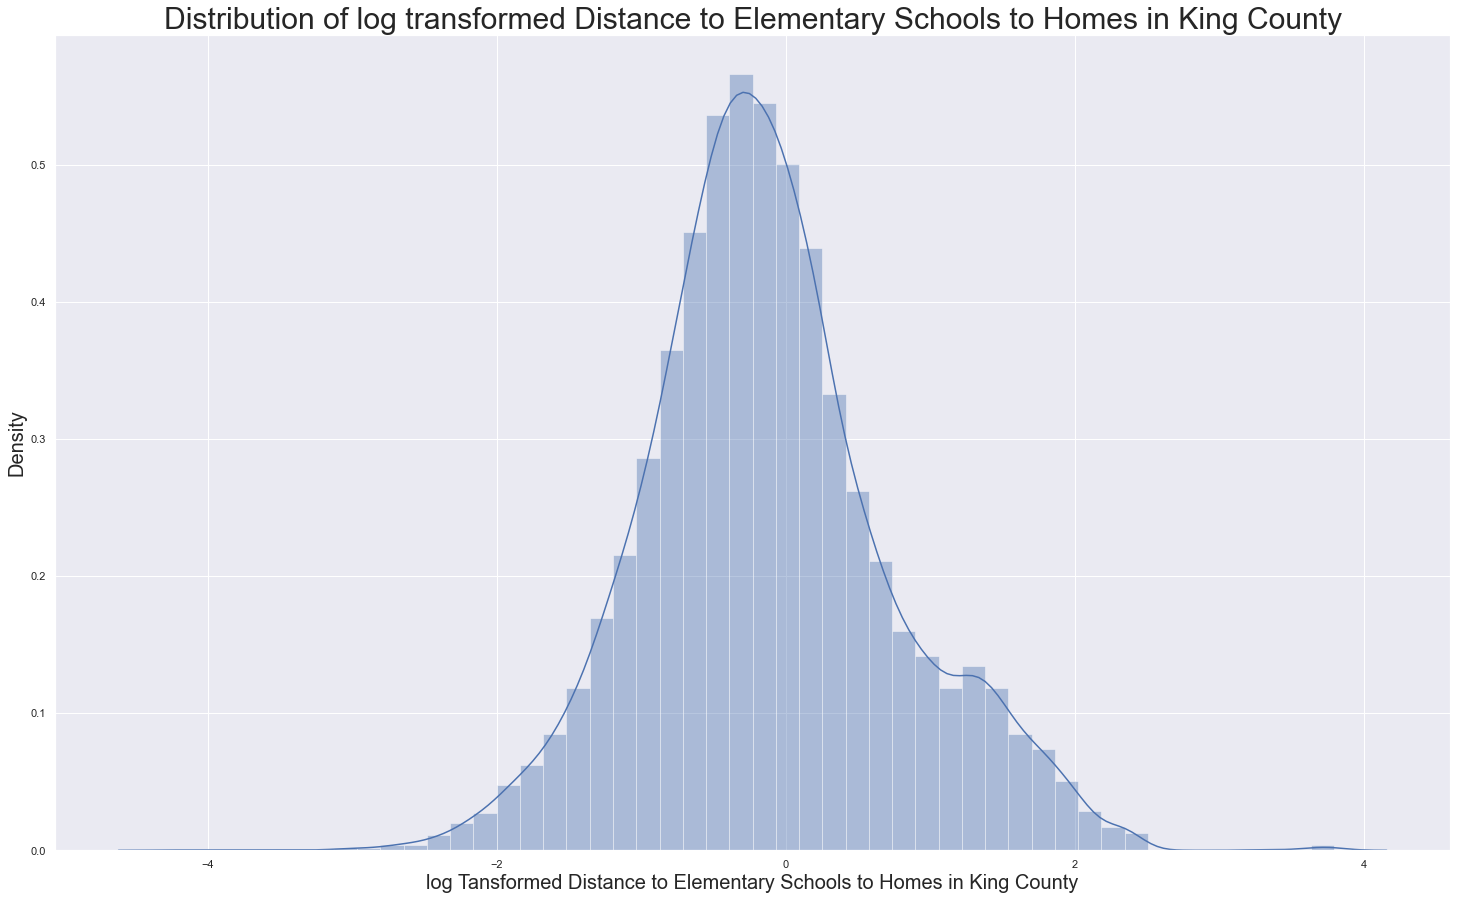

In [10]:
df_norm['log_School_Elementary'] = df['School_Elementary'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['log_School_Elementary'])
plt.title('Distribution of log transformed Distance to Elementary Schools to Homes in King County', fontsize=30)
plt.xlabel('log Tansformed Distance to Elementary Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['log_School_Elementary'].skew())
print('Kurtosis:', df_norm['log_School_Elementary'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 9.498038122689858
Kurtosis: 176.8587909050857


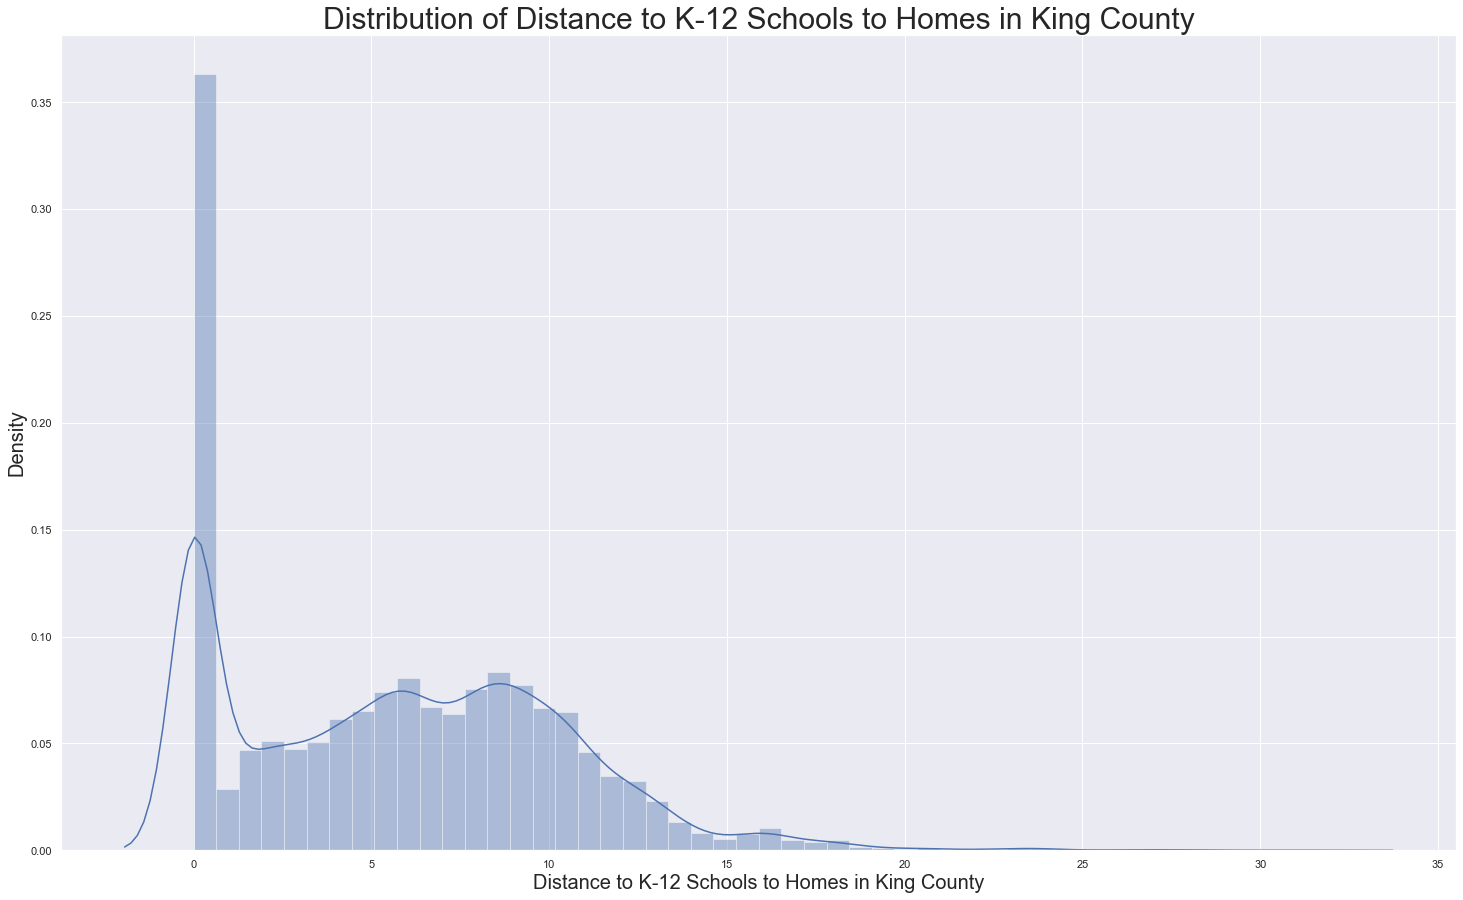

In [11]:
plt.figure(figsize=(25,15))
sns.distplot(df['School_K_12'])
plt.title('Distribution of Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['School_Elementary'].skew())
print('Kurtosis:', df['School_Elementary'].kurt())

In [12]:
df.loc[df['School_K_12']==0.0]

,price,bathrooms,sqft_lot,sqft_living,waterfront,grade,zipcode,lat,long,district,...,School_Junior_High_Middle,School_Elementary,dist_School_High,ef_School_Junior_High_Middle,ef_dist_School_High,ef_School_Elementary,ef_School_K_12,transport_dist,medical_dist,police_station_dist
7,323000.0,2.5,6560,1890,0.0,7,98038,47.3684,-122.031,tahoma,...,2.367053,0.820242,1.204693,4.734107,2.409387,1.640484,0.0,0.000000,2.208031,2.861200
13,395000.0,2.0,14040,1890,0.0,7,98019,47.7277,-121.962,riverview,...,10.131872,2.638758,1.133286,40.527487,4.533143,10.555031,0.0,0.000000,0.000000,2.314498
25,580500.0,2.5,3980,2320,0.0,8,98027,47.5391,-122.070,issaquah,...,3.493290,1.868665,3.615517,3.493290,3.615517,1.868665,0.0,0.696404,1.479626,2.858131
39,488000.0,2.5,13603,3160,0.0,8,98019,47.7443,-121.977,riverview,...,12.261181,0.500301,2.071590,49.044725,8.286362,2.001205,0.0,0.000000,0.000000,0.824546
41,785000.0,2.5,13416,2290,0.0,9,98007,47.6194,-122.151,bellevue,...,0.529282,0.173905,1.220572,0.529282,1.220572,0.173905,0.0,3.323594,1.186892,1.455400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18072,337000.0,2.5,5100,2470,0.0,8,98038,47.3622,-122.041,tahoma,...,3.287968,1.654106,1.045979,6.575935,2.091958,3.308213,0.0,0.000000,1.209959,3.249969
18080,785000.0,3.5,4684,3070,0.0,10,98027,47.5316,-122.076,issaquah,...,3.630268,2.365872,3.696016,3.630268,3.696016,2.365872,0.0,1.567932,2.362969,3.141058
18085,594866.0,3.0,6000,2780,0.0,9,98065,47.5184,-121.886,snoqualmie valley,...,5.857582,0.818934,5.212499,17.572745,15.637496,2.456802,0.0,0.000000,0.670390,1.237607
18086,625000.0,3.0,6000,2780,0.0,9,98065,47.5184,-121.886,snoqualmie valley,...,5.857582,0.818934,5.212499,17.572745,15.637496,2.456802,0.0,0.000000,0.670390,1.237607


In [13]:
df['School_K_12'].max()

31.787079572094747

In [14]:
# Before transforming the feature distance to K-12 I need to change the values that have zeros in them 
df.loc[df['School_K_12']==0, 'School_K_12']=(df['School_K_12'].max()+1)
# I will replace these values with values that are close to the max. I will assume that values that are futhest from a school is
# comparable to the ones that have no near by school

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 9.498038122689858
Kurtosis: 176.8587909050857


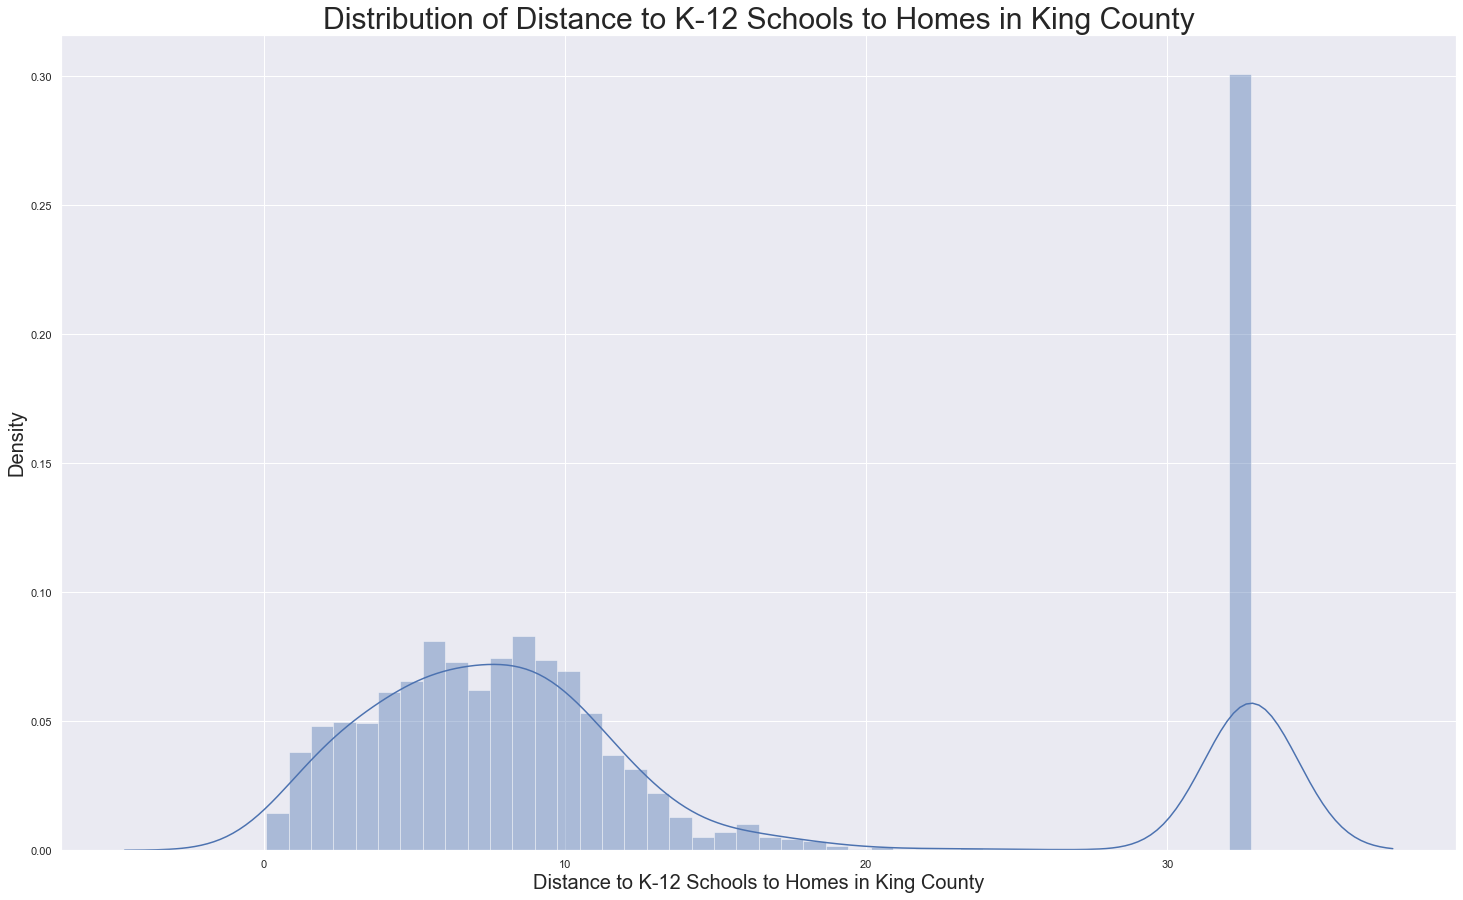

In [15]:
plt.figure(figsize=(25,15))
sns.distplot(df['School_K_12'])
plt.title('Distribution of Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['School_Elementary'].skew())
print('Kurtosis:', df['School_Elementary'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.3659161442545644
Kurtosis: 0.2893989889584705


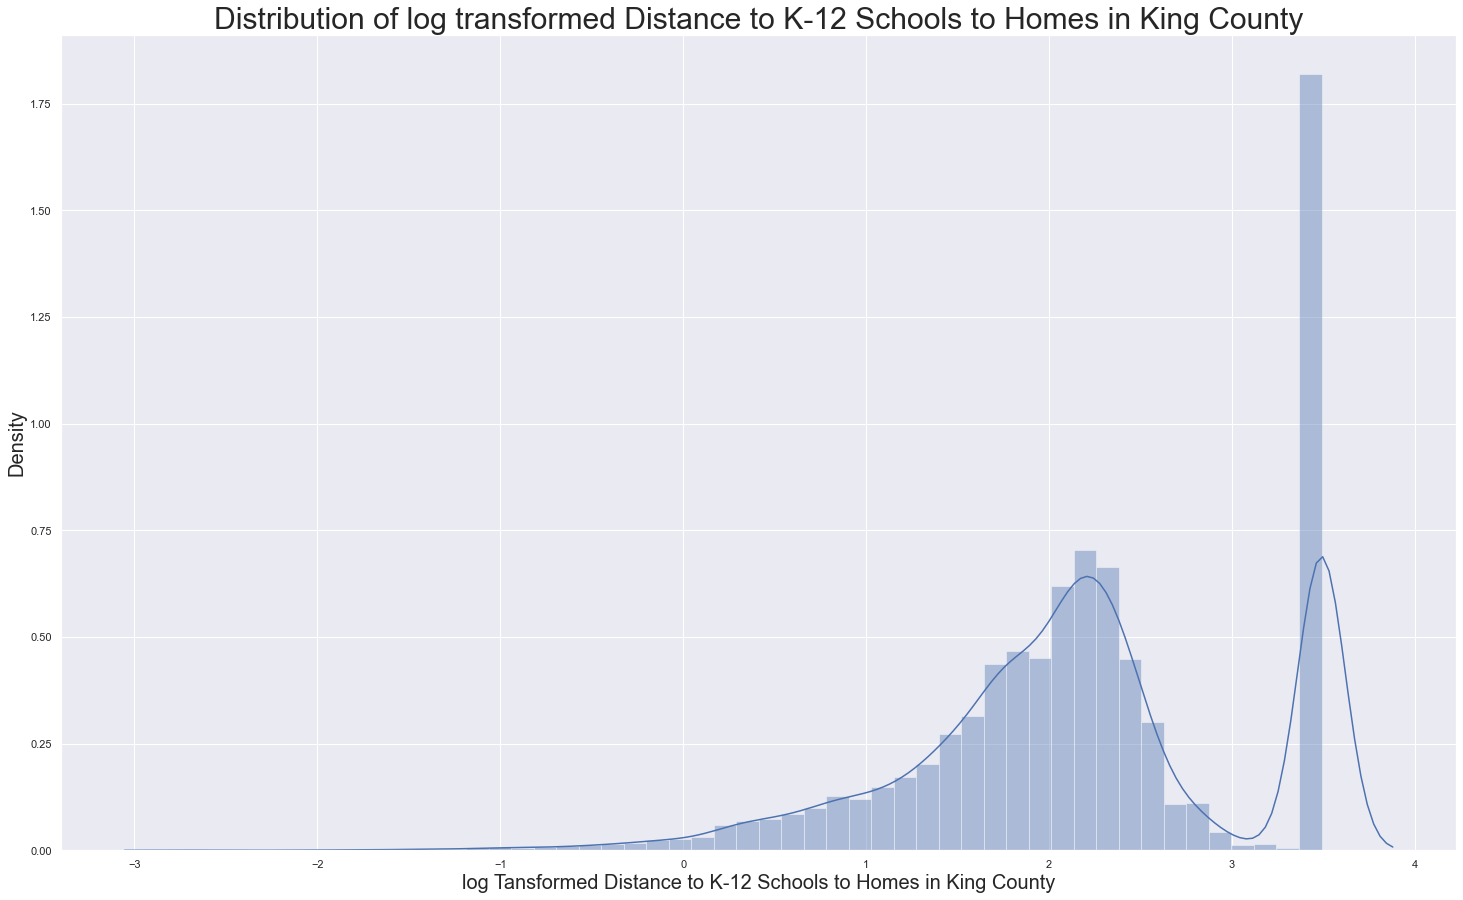

In [16]:
df_norm['log_School_K_12'] = df['School_K_12'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['log_School_K_12'])
plt.title('Distribution of log transformed Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('log Tansformed Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['log_School_K_12'].skew())
print('Kurtosis:', df_norm['log_School_K_12'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.2966046461686485
Kurtosis: 3.0225055448180793


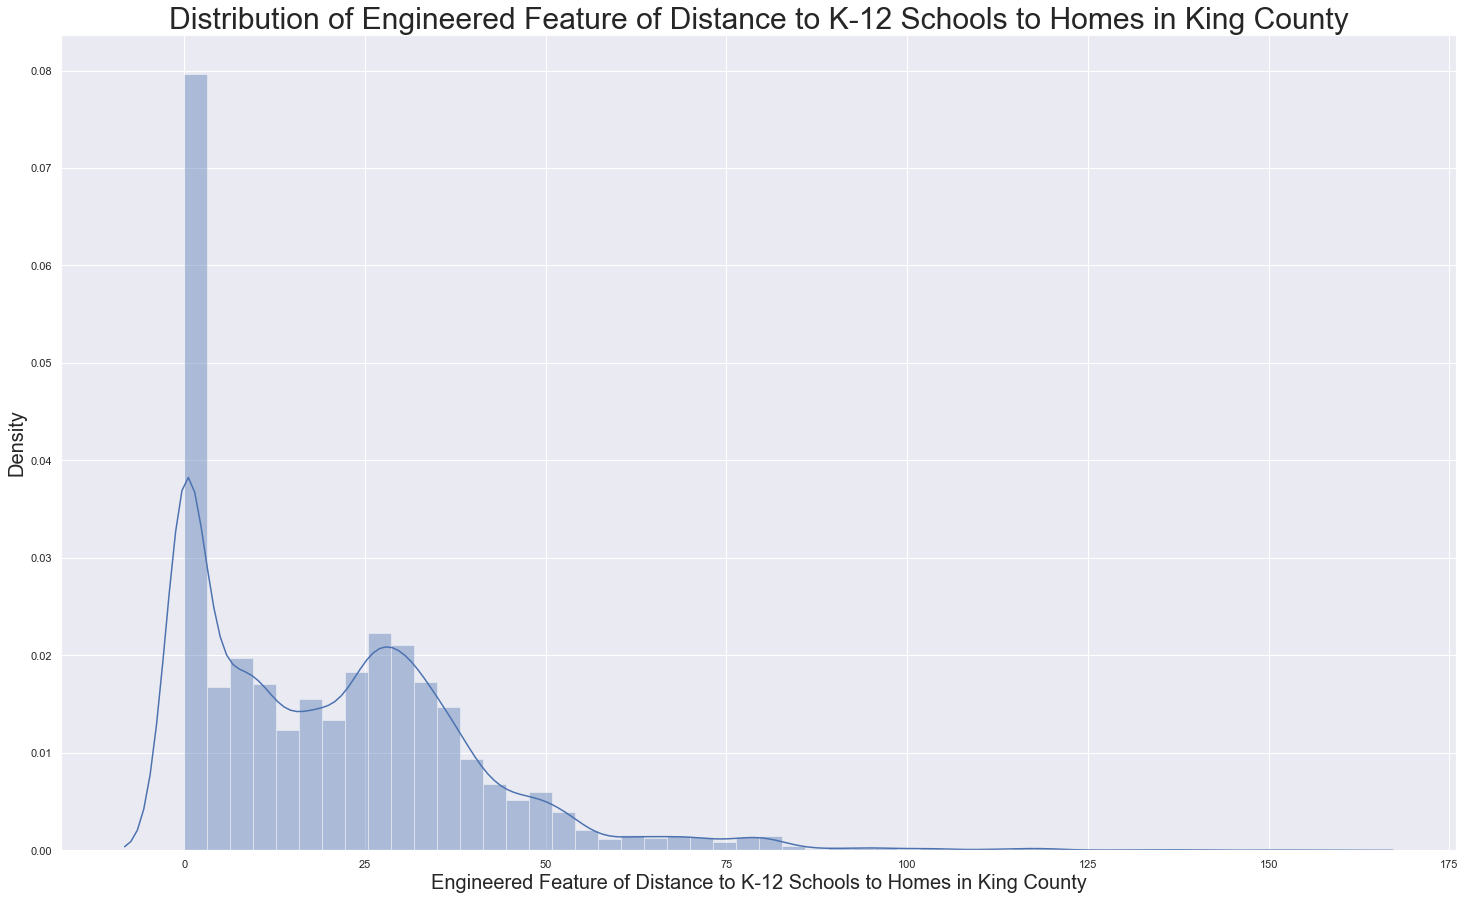

In [17]:
plt.figure(figsize=(25,15))
sns.distplot(df['ef_School_K_12'])
plt.title('Distribution of Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['ef_School_K_12'].skew())
print('Kurtosis:', df['ef_School_K_12'].kurt())

In [18]:
df['ef_School_K_12'].max()

158.93539786047373

In [19]:
# Before transforming the feature distance to K-12 I need to change the values that have zeros in them 
df.loc[df['ef_School_K_12']==0, 'ef_School_K_12']=(df['ef_School_K_12'].max()+1)
# I will replace these values with values that are close to the max. I will assume that values that are futhest from a school is
# comparable to the ones that have no near by school

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.0916650893015605
Kurtosis: -0.5462826679777408


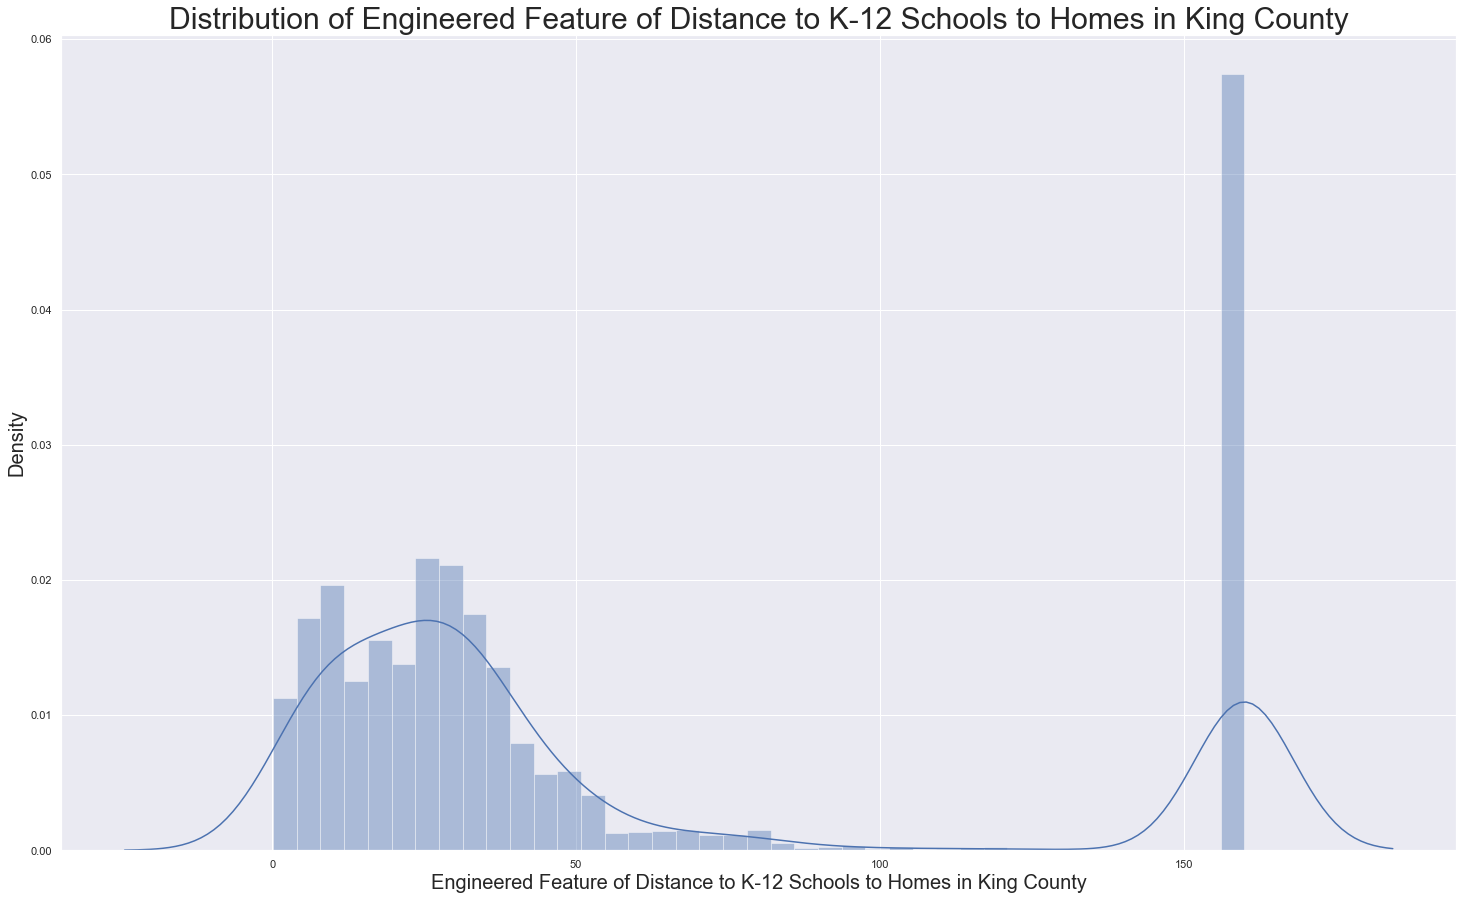

In [20]:
plt.figure(figsize=(25,15))
sns.distplot(df['ef_School_K_12'])
plt.title('Distribution of Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['ef_School_K_12'].skew())
print('Kurtosis:', df['ef_School_K_12'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.2626263910224313
Kurtosis: -0.16465234174344356


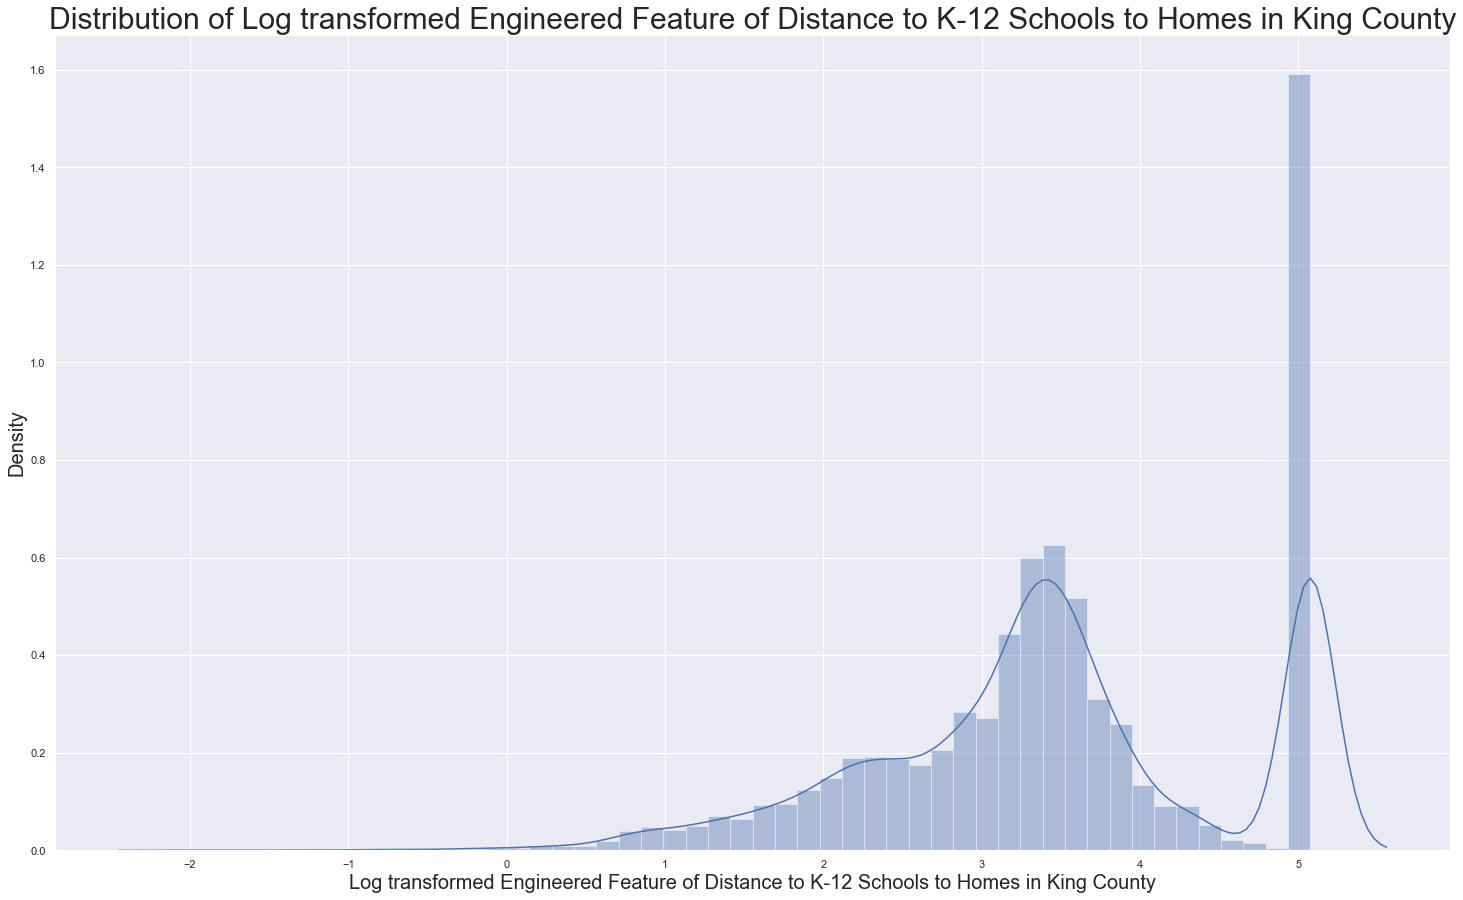

In [21]:
df_norm['ef_School_K_12_log'] = df['ef_School_K_12'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['ef_School_K_12_log'])
plt.title('Distribution of Log transformed Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Engineered Feature of Distance to K-12 Schools to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['ef_School_K_12_log'].skew())
print('Kurtosis:', df_norm['ef_School_K_12_log'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 2.689957848305648
Kurtosis: 8.70474390080699


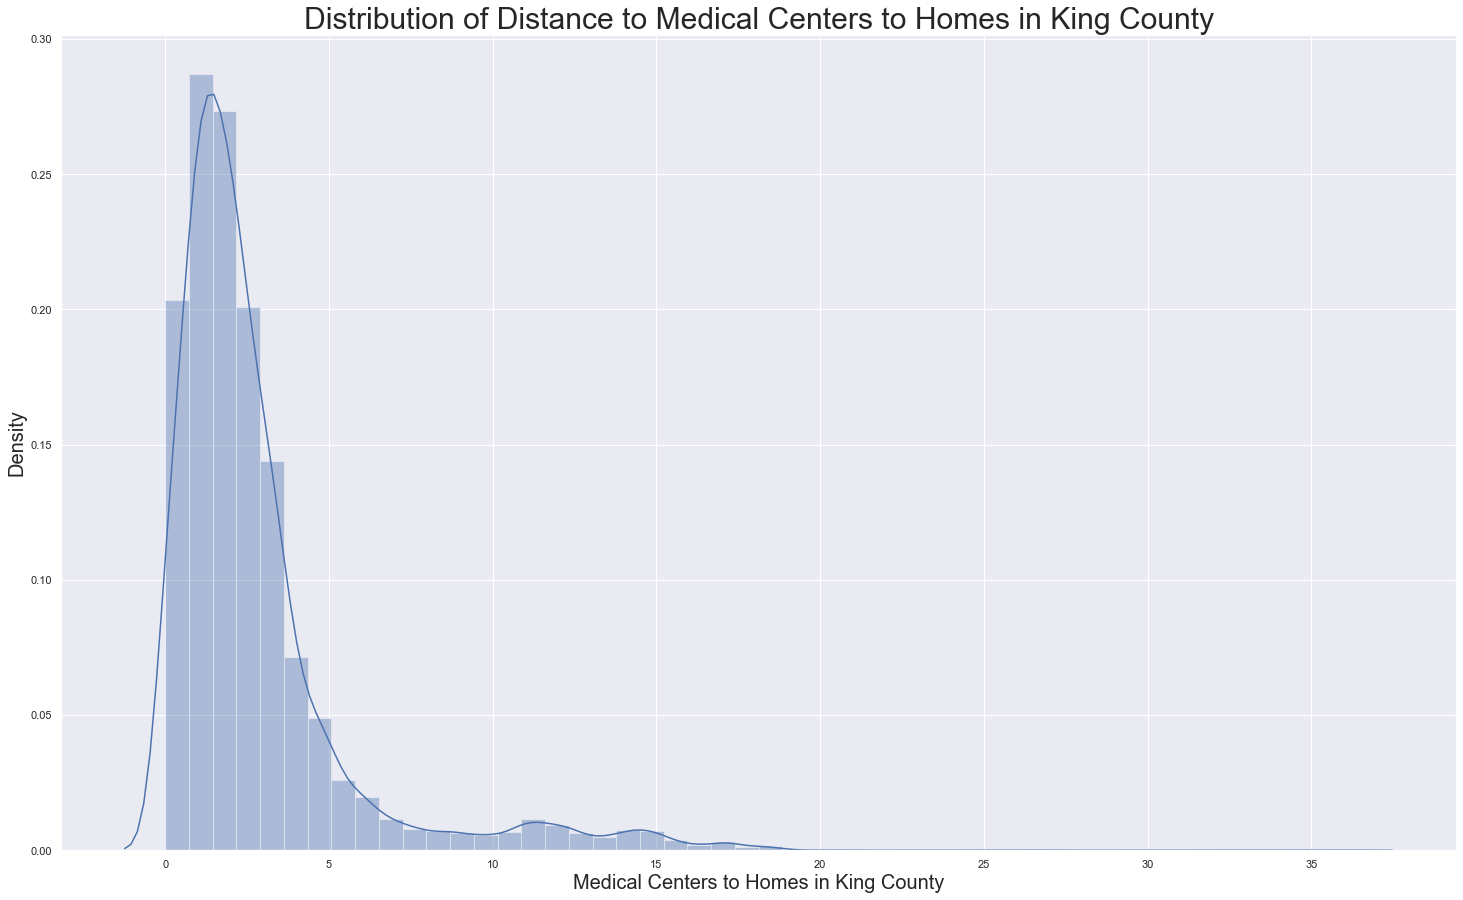

In [22]:
plt.figure(figsize=(25,15))
sns.distplot(df['medical_dist'])
plt.title('Distribution of Distance to Medical Centers to Homes in King County', fontsize=30)
plt.xlabel('Medical Centers to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['medical_dist'].skew())
print('Kurtosis:', df['medical_dist'].kurt())

In [23]:
df['medical_dist'].mean()

2.758561273454841

In [24]:
# Before transforming the feature distance to medical center I need to change the values that have zeros in them 
df.loc[df['medical_dist']==0, 'medical_dist']=df['medical_dist'].mean()
# I will replace these values with values that are the mean.

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 2.788859976380863
Kurtosis: 9.278985720716541


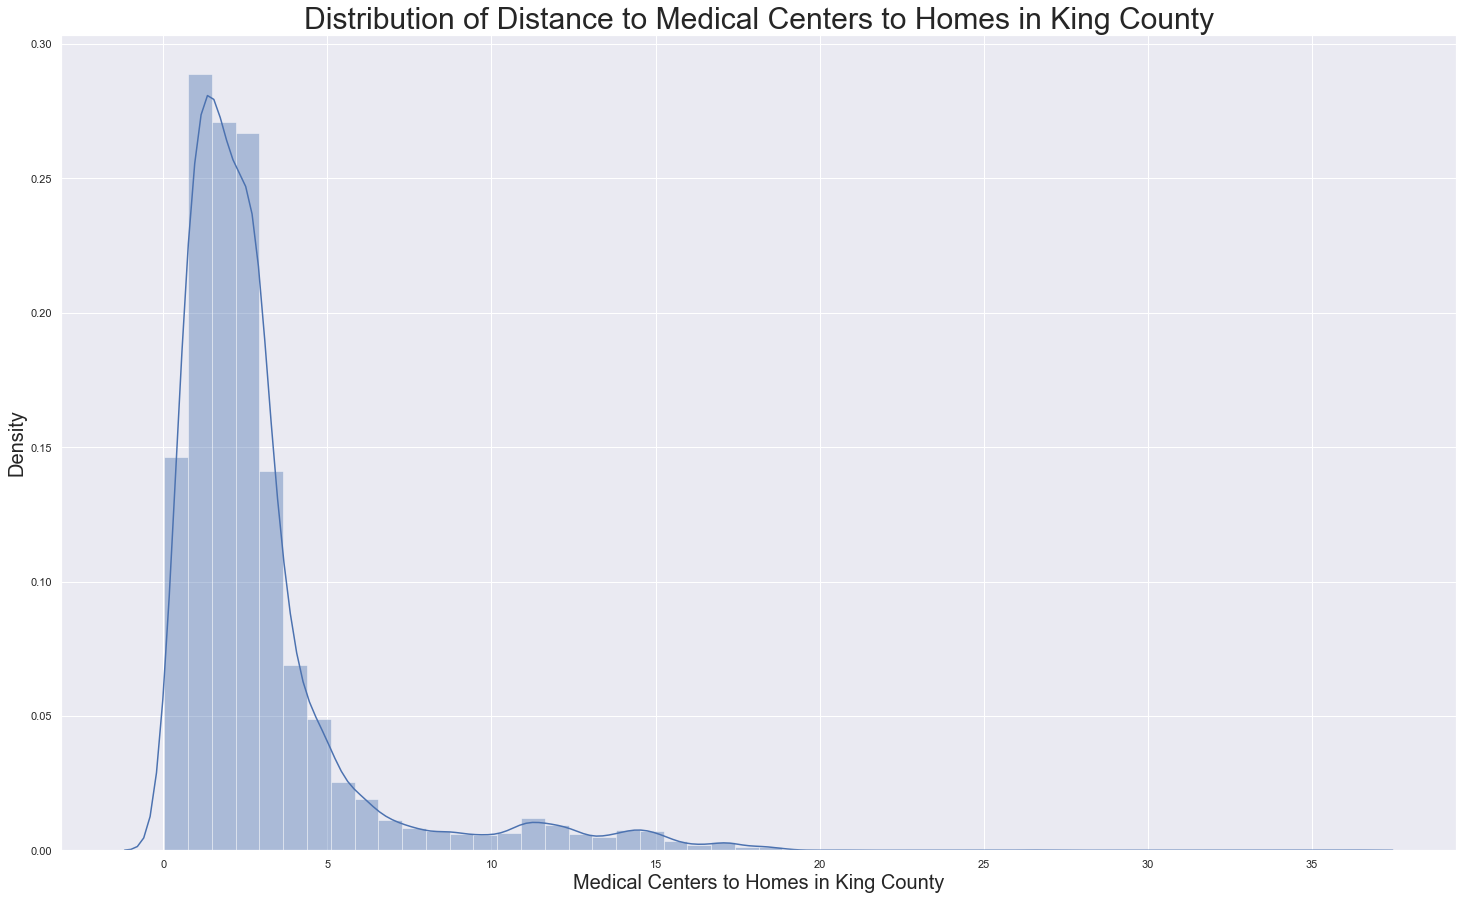

In [25]:
plt.figure(figsize=(25,15))
sns.distplot(df['medical_dist'])
plt.title('Distribution of Distance to Medical Centers to Homes in King County', fontsize=30)
plt.xlabel('Medical Centers to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['medical_dist'].skew())
print('Kurtosis:', df['medical_dist'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.12382615464295961
Kurtosis: 0.7726088486361511


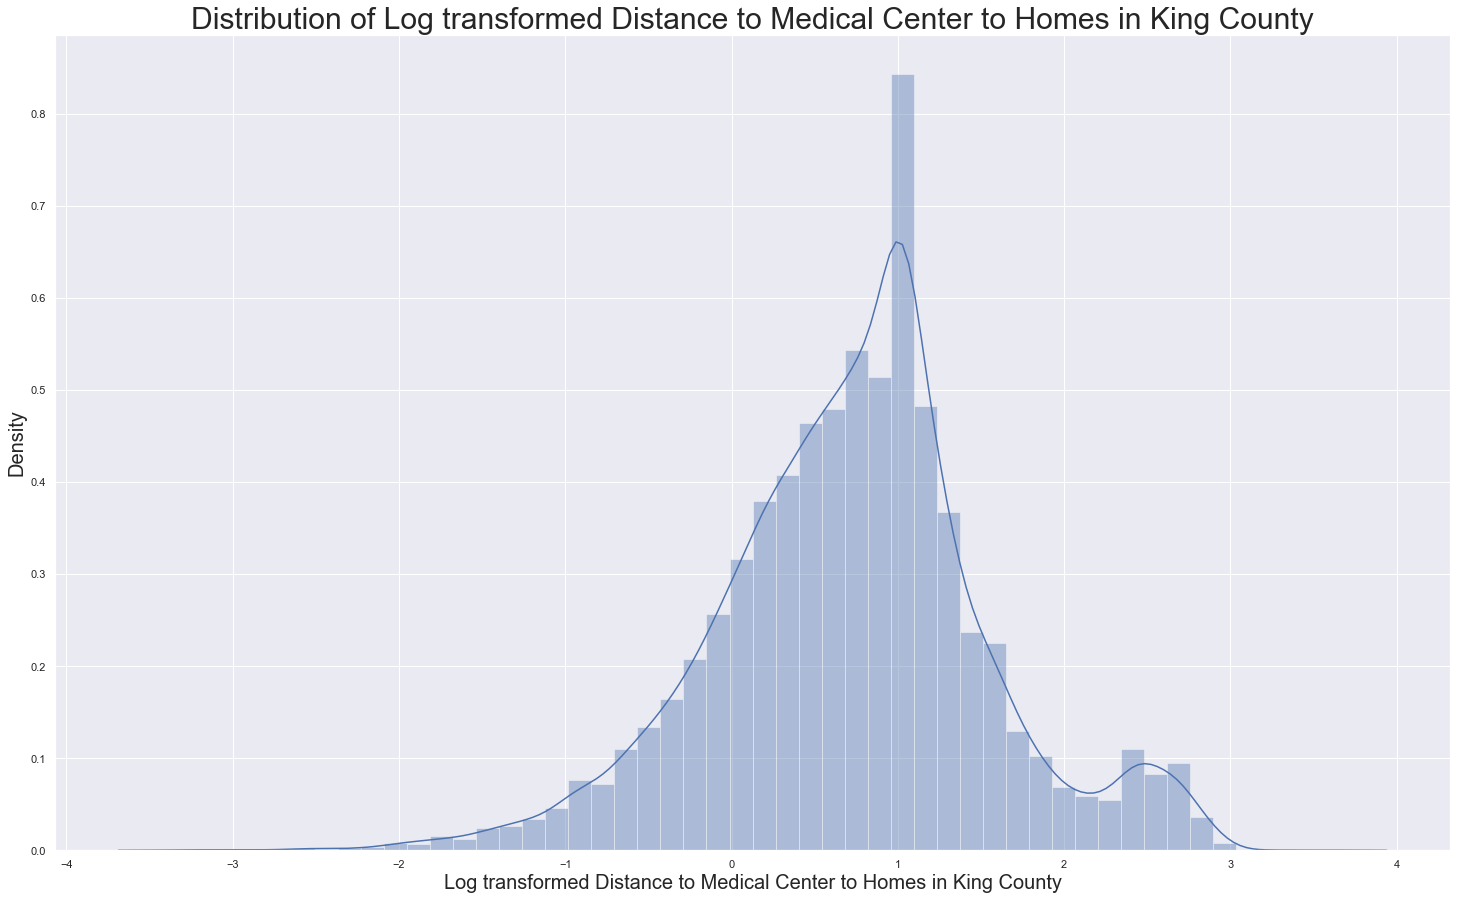

In [26]:
df_norm['medical_dist_log'] = df['medical_dist'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['medical_dist_log'])
plt.title('Distribution of Log transformed Distance to Medical Center to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Distance to Medical Center to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['medical_dist_log'].skew())
print('Kurtosis:', df_norm['medical_dist_log'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 2.788859976380863
Kurtosis: 9.278985720716541


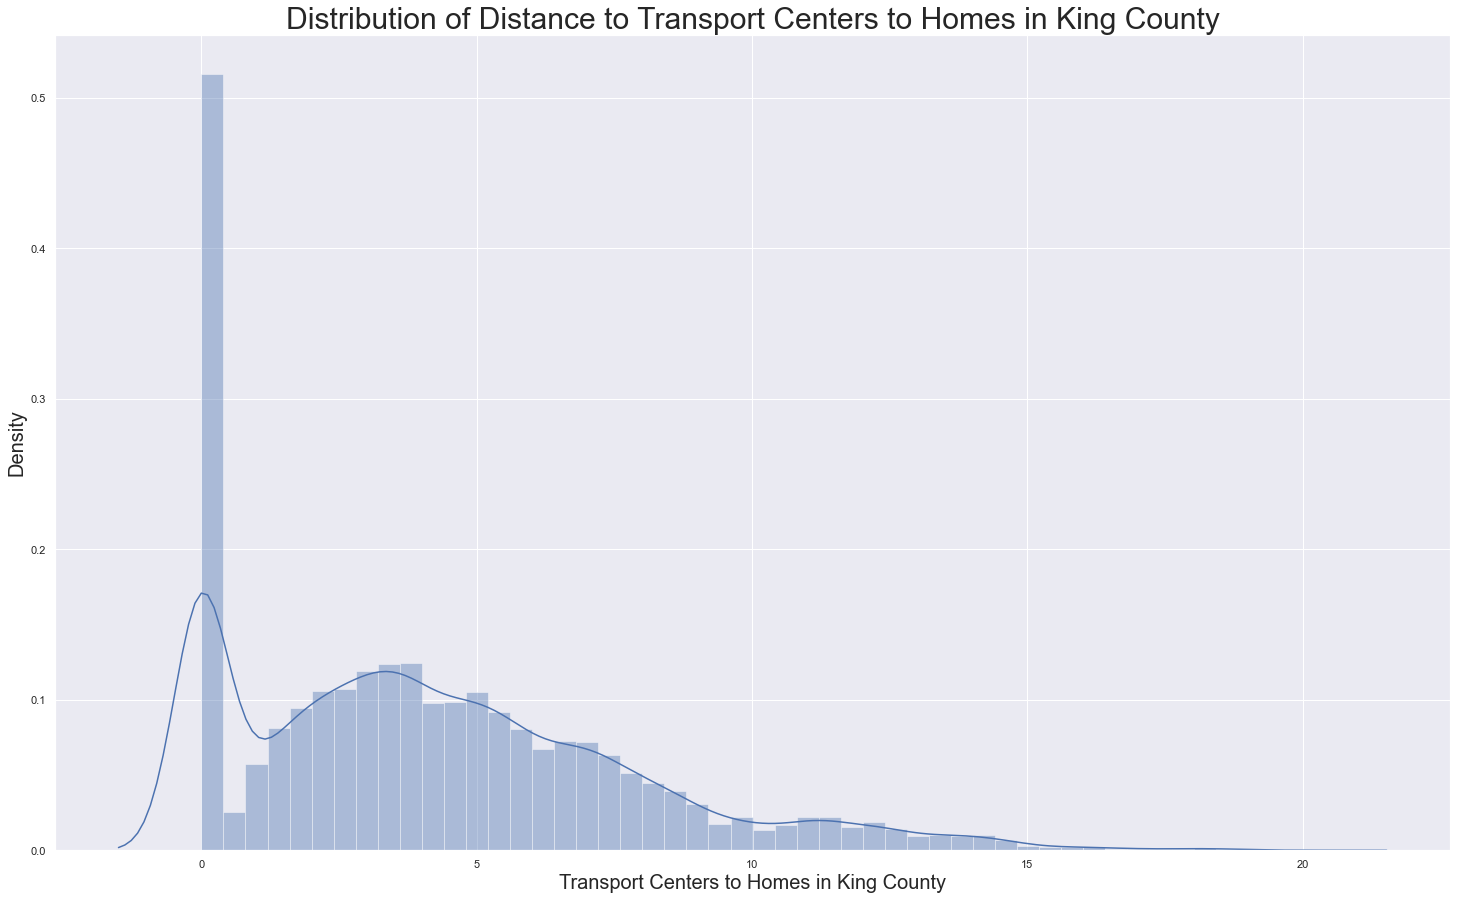

In [27]:
plt.figure(figsize=(25,15))
sns.distplot(df['transport_dist'])
plt.title('Distribution of Distance to Transport Centers to Homes in King County', fontsize=30)
plt.xlabel('Transport Centers to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['medical_dist'].skew())
print('Kurtosis:', df['medical_dist'].kurt())

In [28]:
df['transport_dist'].max()

20.022081414794023

In [29]:
# Before transforming the feature distance to medical center I need to change the values that have zeros in them 
df.loc[df['transport_dist']==0, 'transport_dist']=df['transport_dist'].max()
# I will replace these values with values that are the mean.

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.9080666538322124
Kurtosis: -0.6945002664909015


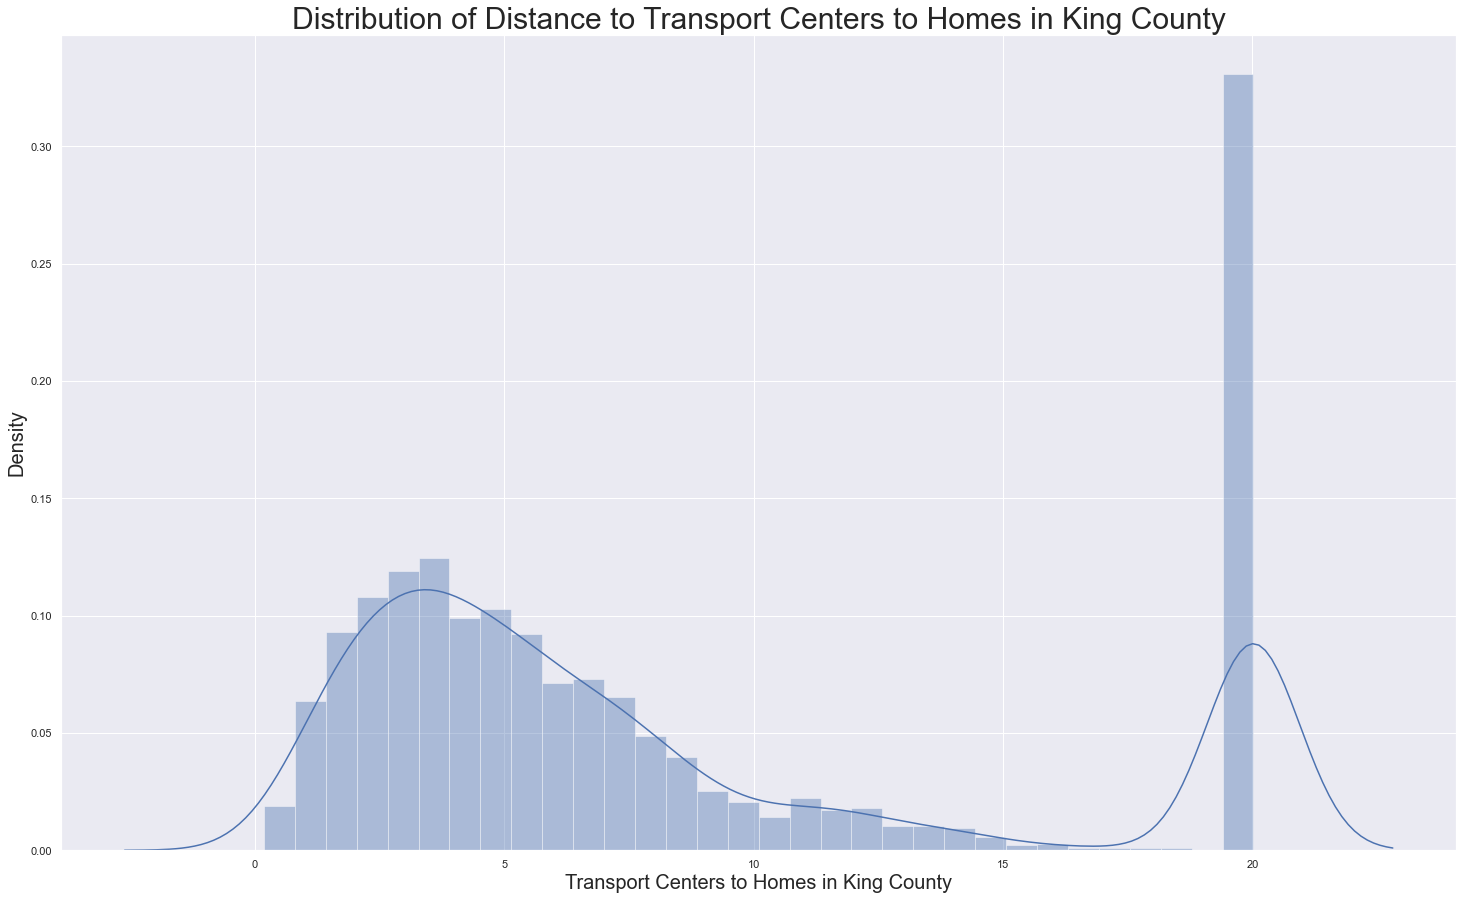

In [30]:
plt.figure(figsize=(25,15))
sns.distplot(df['transport_dist'])
plt.title('Distribution of Distance to Transport Centers to Homes in King County', fontsize=30)
plt.xlabel('Transport Centers to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df['transport_dist'].skew())
print('Kurtosis:', df['transport_dist'].kurt())

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.1958683241451402
Kurtosis: -0.4883552055466387


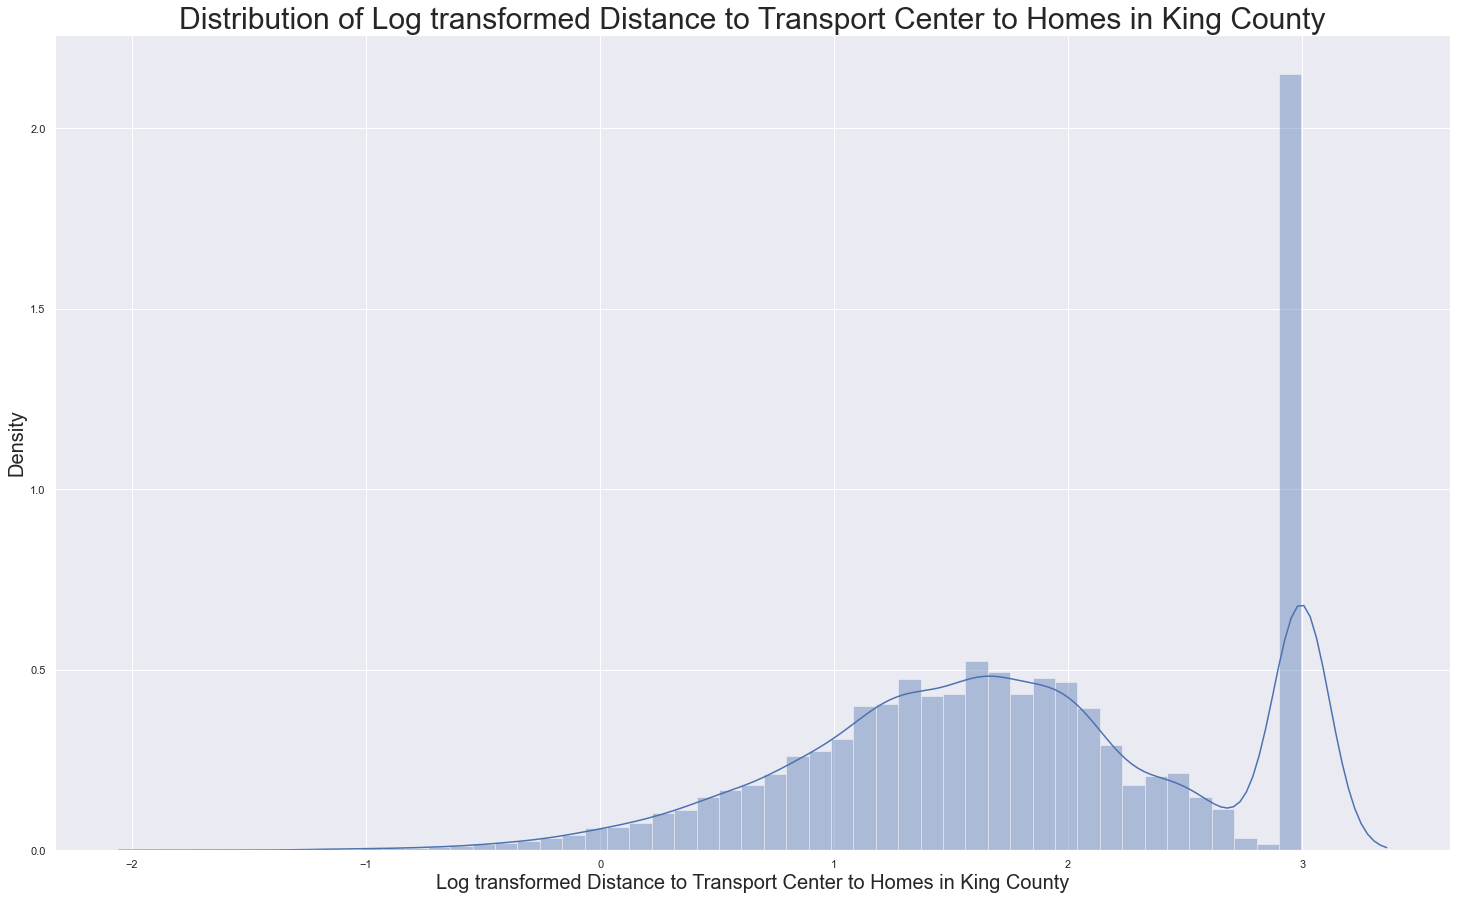

In [31]:
df_norm['transport_dist_log'] = df['transport_dist'].map(lambda x: np.log(x))

plt.figure(figsize=(25,15))
sns.distplot(df_norm['transport_dist_log'])
plt.title('Distribution of Log transformed Distance to Transport Center to Homes in King County', fontsize=30)
plt.xlabel('Log transformed Distance to Transport Center to Homes in King County', fontsize=20);
plt.ylabel('Density', fontsize=20);

print('Skewness:', df_norm['transport_dist_log'].skew())
print('Kurtosis:', df_norm['transport_dist_log'].kurt())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002492C99D9E8>,
      dtype=object)

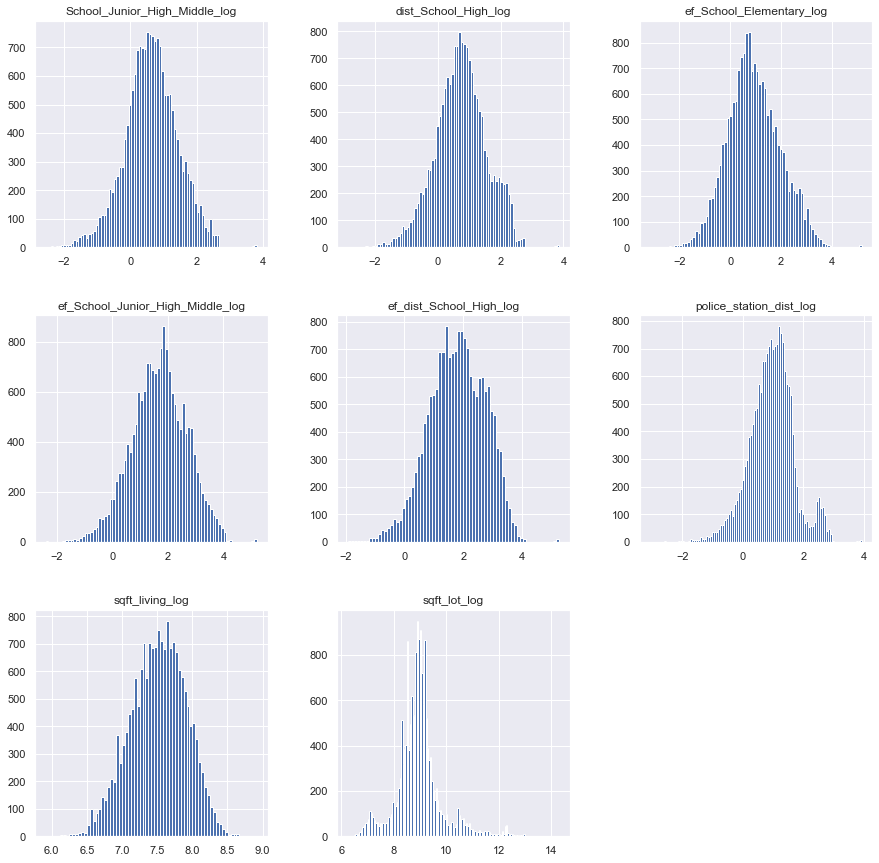

In [32]:
df_cont = df[['School_Junior_High_Middle','dist_School_High','ef_School_Junior_High_Middle','ef_dist_School_High','ef_School_Elementary','police_station_dist','sqft_living','sqft_lot']]
log_names = [f'{column}_log' for column in df_cont.columns]

data_pc_log = np.log(df_cont)
data_pc_log.columns = log_names
data_pc_log.hist(figsize = [15,15], bins = 'auto')


In [33]:
df_norm = pd.concat([df_norm,data_pc_log], axis=1)

In [34]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 14 columns):
log_price                           18109 non-null float64
log_School_Elementary               18109 non-null float64
log_School_K_12                     18109 non-null float64
ef_School_K_12_log                  18109 non-null float64
medical_dist_log                    18109 non-null float64
transport_dist_log                  18109 non-null float64
School_Junior_High_Middle_log       18109 non-null float64
dist_School_High_log                18109 non-null float64
ef_School_Junior_High_Middle_log    18109 non-null float64
ef_dist_School_High_log             18109 non-null float64
ef_School_Elementary_log            18109 non-null float64
police_station_dist_log             18109 non-null float64
sqft_living_log                     18109 non-null float64
sqft_lot_log                        18109 non-null float64
dtypes: float64(14)
memory usage: 1.9 MB


In [35]:
df_categ = df[['grade','bathrooms','grade_rank','waterfront','district']]

In [36]:
df_norm = pd.concat([df_norm,df_categ], axis=1)

In [37]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 19 columns):
log_price                           18109 non-null float64
log_School_Elementary               18109 non-null float64
log_School_K_12                     18109 non-null float64
ef_School_K_12_log                  18109 non-null float64
medical_dist_log                    18109 non-null float64
transport_dist_log                  18109 non-null float64
School_Junior_High_Middle_log       18109 non-null float64
dist_School_High_log                18109 non-null float64
ef_School_Junior_High_Middle_log    18109 non-null float64
ef_dist_School_High_log             18109 non-null float64
ef_School_Elementary_log            18109 non-null float64
police_station_dist_log             18109 non-null float64
sqft_living_log                     18109 non-null float64
sqft_lot_log                        18109 non-null float64
grade                               18109 non-null int64
bathroom

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024933D8A2E8>,
      dtype=object)

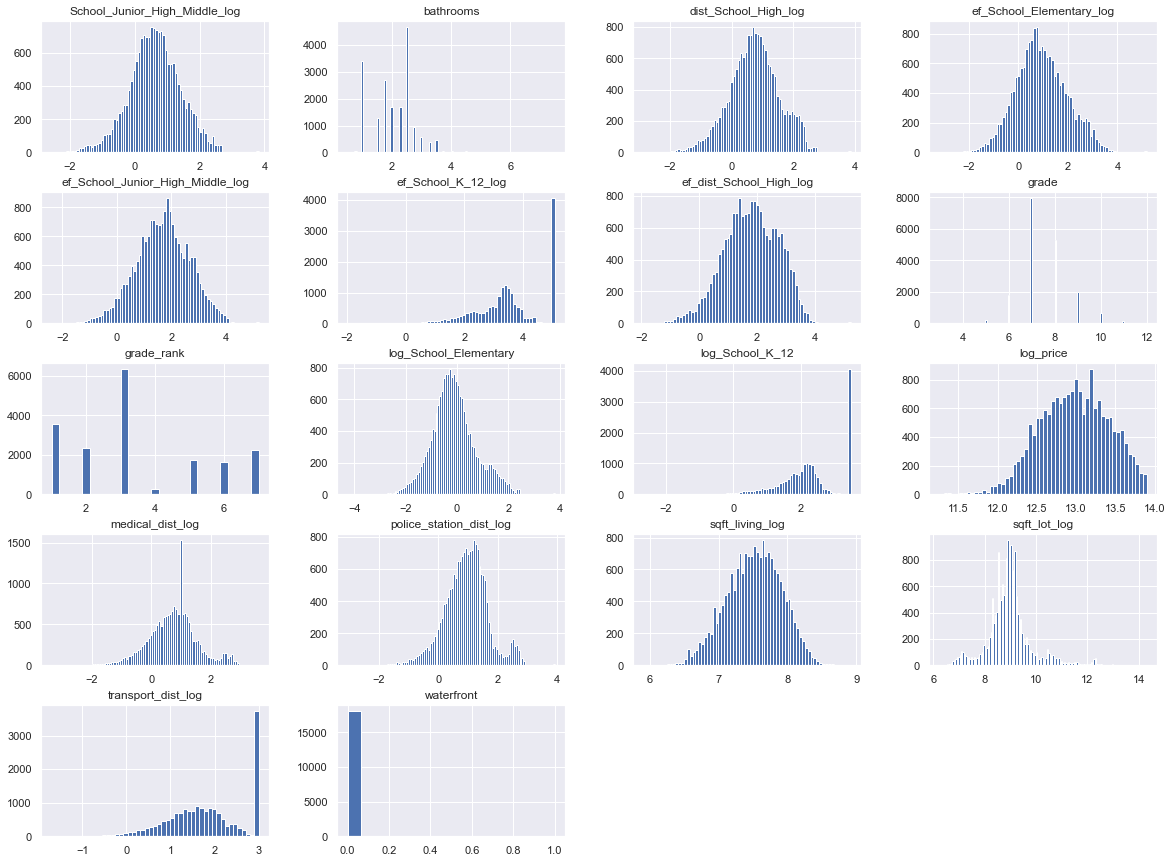

In [38]:
df_norm.hist(figsize=(20,15), bins='auto')

In [39]:
df_norm.drop(['district'], axis=1, inplace=True)

In [40]:
grade_dummy = pd.get_dummies(df_norm.grade, prefix='grade', drop_first=True)
grade_rank_dummy = pd.get_dummies(df_norm.grade_rank, prefix='grade_rank', drop_first=True)


df_processed_norm = pd.concat([df_norm, grade_dummy, grade_rank_dummy], axis=1)

df_processed_norm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 33 columns):
log_price                           18109 non-null float64
log_School_Elementary               18109 non-null float64
log_School_K_12                     18109 non-null float64
ef_School_K_12_log                  18109 non-null float64
medical_dist_log                    18109 non-null float64
transport_dist_log                  18109 non-null float64
School_Junior_High_Middle_log       18109 non-null float64
dist_School_High_log                18109 non-null float64
ef_School_Junior_High_Middle_log    18109 non-null float64
ef_dist_School_High_log             18109 non-null float64
ef_School_Elementary_log            18109 non-null float64
police_station_dist_log             18109 non-null float64
sqft_living_log                     18109 non-null float64
sqft_lot_log                        18109 non-null float64
grade                               18109 non-null int64
bathroom

In [41]:
df_processed_norm = df_processed_norm.drop(['grade','grade_rank'], axis=1)

In [63]:
df_processed_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 31 columns):
log_price                           18109 non-null float64
log_School_Elementary               18109 non-null float64
log_School_K_12                     18109 non-null float64
ef_School_K_12_log                  18109 non-null float64
medical_dist_log                    18109 non-null float64
transport_dist_log                  18109 non-null float64
School_Junior_High_Middle_log       18109 non-null float64
dist_School_High_log                18109 non-null float64
ef_School_Junior_High_Middle_log    18109 non-null float64
ef_dist_School_High_log             18109 non-null float64
ef_School_Elementary_log            18109 non-null float64
police_station_dist_log             18109 non-null float64
sqft_living_log                     18109 non-null float64
sqft_lot_log                        18109 non-null float64
bathrooms                           18109 non-null float64
waterf

In [42]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002492ACB75C0>,
      dtype=object)

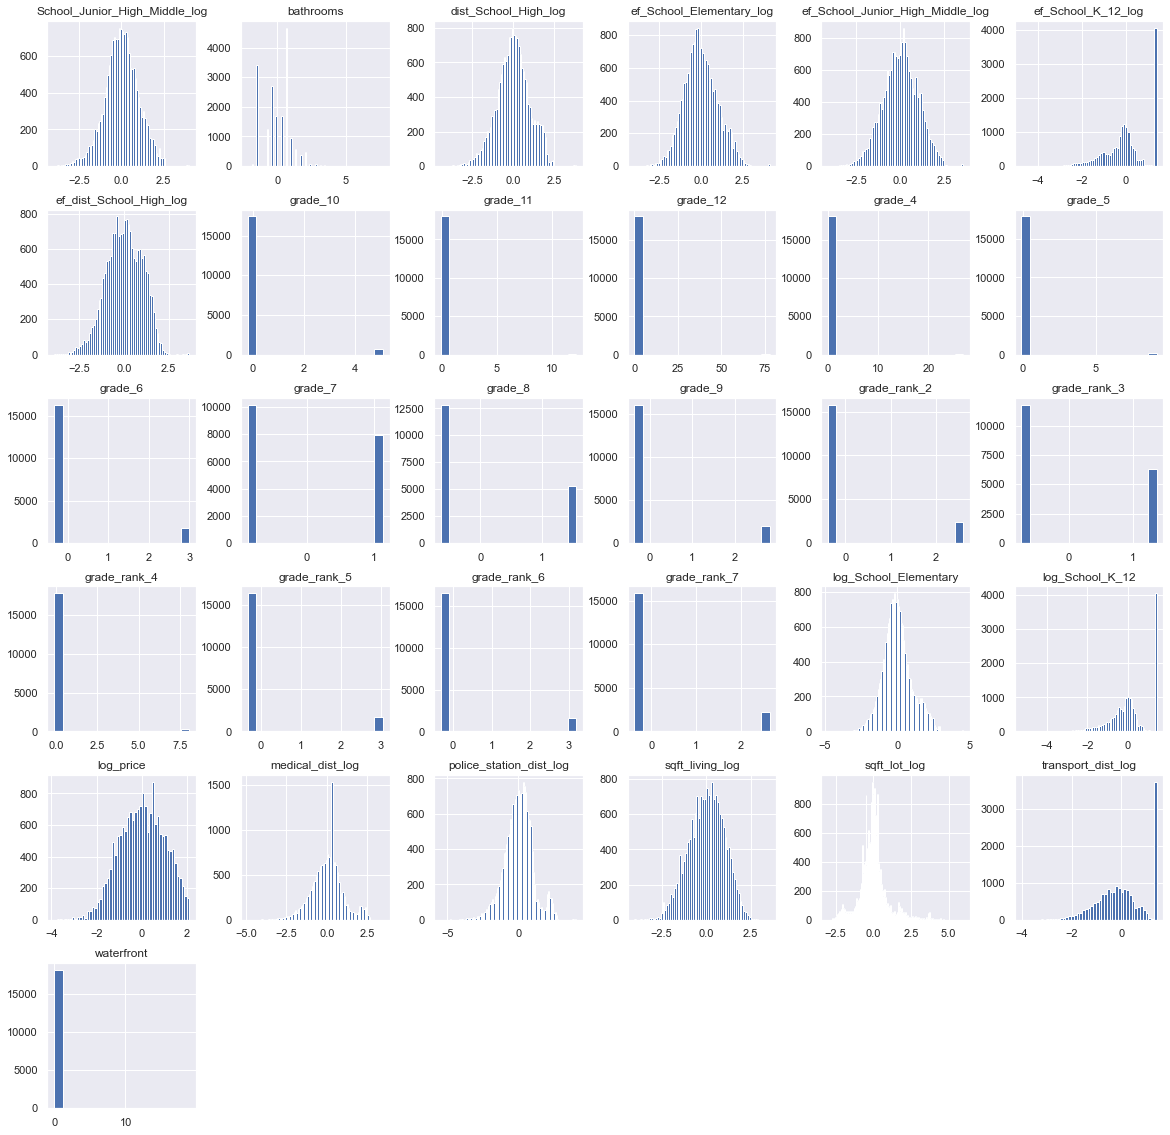

In [43]:
df_norm_final = df_processed_norm.apply(normalize)
df_norm_final.hist(figsize  = [20, 20], color='b', bins= 'auto')

In [44]:
df_norm_final.to_csv('df_norm_final', index=False)

# Transfromation Technique: Quantile Transformation

In [45]:
df_cont_quantile = df[['price','School_Elementary','School_K_12','School_Junior_High_Middle','dist_School_High','ef_School_K_12','ef_School_Junior_High_Middle','ef_dist_School_High','ef_School_Elementary','police_station_dist','medical_dist','transport_dist','sqft_living','sqft_lot']]

In [56]:
transform = ['price','School_Elementary','School_K_12','School_Junior_High_Middle','dist_School_High','ef_School_K_12','ef_School_Junior_High_Middle','ef_dist_School_High','ef_School_Elementary','police_station_dist','medical_dist','transport_dist','sqft_living','sqft_lot']

In [52]:
df_cont_quantile

,price,School_Elementary,School_K_12,School_Junior_High_Middle,dist_School_High,ef_School_K_12,ef_School_Junior_High_Middle,ef_dist_School_High,ef_School_Elementary,police_station_dist,medical_dist,transport_dist,sqft_living,sqft_lot
0,538000.0,0.395590,11.140996,1.012163,1.424494,33.422989,3.036488,4.273482,1.186770,2.329885,1.520117,2.200032,2570,7242
1,180000.0,0.179572,3.402627,4.019878,0.822000,6.805255,8.039757,1.644000,0.359145,2.797147,3.526628,10.578848,770,10000
2,604000.0,1.692124,13.790617,2.338692,2.204664,41.371852,7.016075,6.613991,5.076371,2.876385,2.501342,9.593575,1960,5000
3,510000.0,1.149859,7.330850,2.089249,1.129238,7.330850,2.089249,1.129238,1.149859,14.495456,14.881427,13.590865,1680,8080
4,257500.0,1.111754,1.830627,2.351809,2.267955,12.814386,16.462666,15.875688,7.782280,0.638233,0.607868,1.894400,1715,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18104,475000.0,0.089681,10.350240,1.483939,1.780232,31.050720,4.451818,5.340697,0.269044,5.803505,1.760577,8.413401,1310,1294
18105,360000.0,1.353518,9.517683,0.623003,1.325666,28.553050,1.869008,3.976999,4.060553,0.931870,0.676973,1.431449,1530,1131
18106,400000.0,0.988853,10.420255,0.616743,2.213985,72.941782,4.317199,15.497896,6.921973,0.698151,1.694693,4.882002,2310,5813
18107,402101.0,0.388024,3.263548,0.552658,1.211531,9.790644,1.657975,3.634592,1.164072,1.863861,0.879425,1.870287,1020,1350


In [57]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
df_cont_quantile[transform] = qt.fit_transform(df_cont_quantile[transform])

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [58]:
df_cont_quantile

,price,School_Elementary,School_K_12,School_Junior_High_Middle,dist_School_High,ef_School_K_12,ef_School_Junior_High_Middle,ef_dist_School_High,ef_School_Elementary,police_station_dist,medical_dist,transport_dist,sqft_living,sqft_lot
0,0.428893,-1.021385,0.420534,-0.834046,-0.495160,0.144969,-0.590113,-0.333169,-0.738091,-0.169481,-0.447517,-1.153093,0.826698,-0.087753
1,-1.985876,-1.935598,-1.132856,0.992674,-1.156272,-1.341114,0.429194,-1.349869,-1.984760,0.106745,0.815883,0.610120,-2.107953,0.616541
2,0.694311,0.850115,0.639904,0.312582,0.074437,0.408232,0.284062,0.086594,0.689516,0.148229,0.198045,0.557618,0.128317,-0.695908
3,0.320290,0.437138,-0.273741,0.160503,-0.793555,-1.283234,-0.959181,-1.705278,-0.770188,2.258497,2.290795,0.762616,-0.236799,0.164366
4,-1.123415,0.394440,-1.627404,0.320928,0.114781,-0.837562,1.116627,0.963461,1.048117,-1.787630,-1.471741,-1.311357,-0.190162,-0.210920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18104,0.179102,-2.761840,0.298703,-0.302296,-0.216228,0.028461,-0.196783,-0.121228,-2.278641,1.330836,-0.264624,0.458498,-0.821412,-1.862288
18105,-0.378977,0.632365,0.154930,-1.395221,-0.592775,-0.103337,-1.055202,-0.417769,0.500447,-1.399062,-1.363935,-1.625408,-0.455640,-2.110438
18106,-0.177827,0.243180,0.311984,-1.406199,0.079020,0.692184,-0.226118,0.935471,0.949542,-1.691274,-0.313755,-0.188364,0.542335,-0.450321
18107,-0.162296,-1.046581,-1.165800,-1.528277,-0.707265,-1.036323,-1.172414,-0.517097,-0.757724,-0.496794,-1.092528,-1.326325,-1.401177,-1.810944


In [60]:
df_cont_quantile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 14 columns):
price                           18109 non-null float64
School_Elementary               18109 non-null float64
School_K_12                     18109 non-null float64
School_Junior_High_Middle       18109 non-null float64
dist_School_High                18109 non-null float64
ef_School_K_12                  18109 non-null float64
ef_School_Junior_High_Middle    18109 non-null float64
ef_dist_School_High             18109 non-null float64
ef_School_Elementary            18109 non-null float64
police_station_dist             18109 non-null float64
medical_dist                    18109 non-null float64
transport_dist                  18109 non-null float64
sqft_living                     18109 non-null float64
sqft_lot                        18109 non-null float64
dtypes: float64(14)
memory usage: 1.9 MB


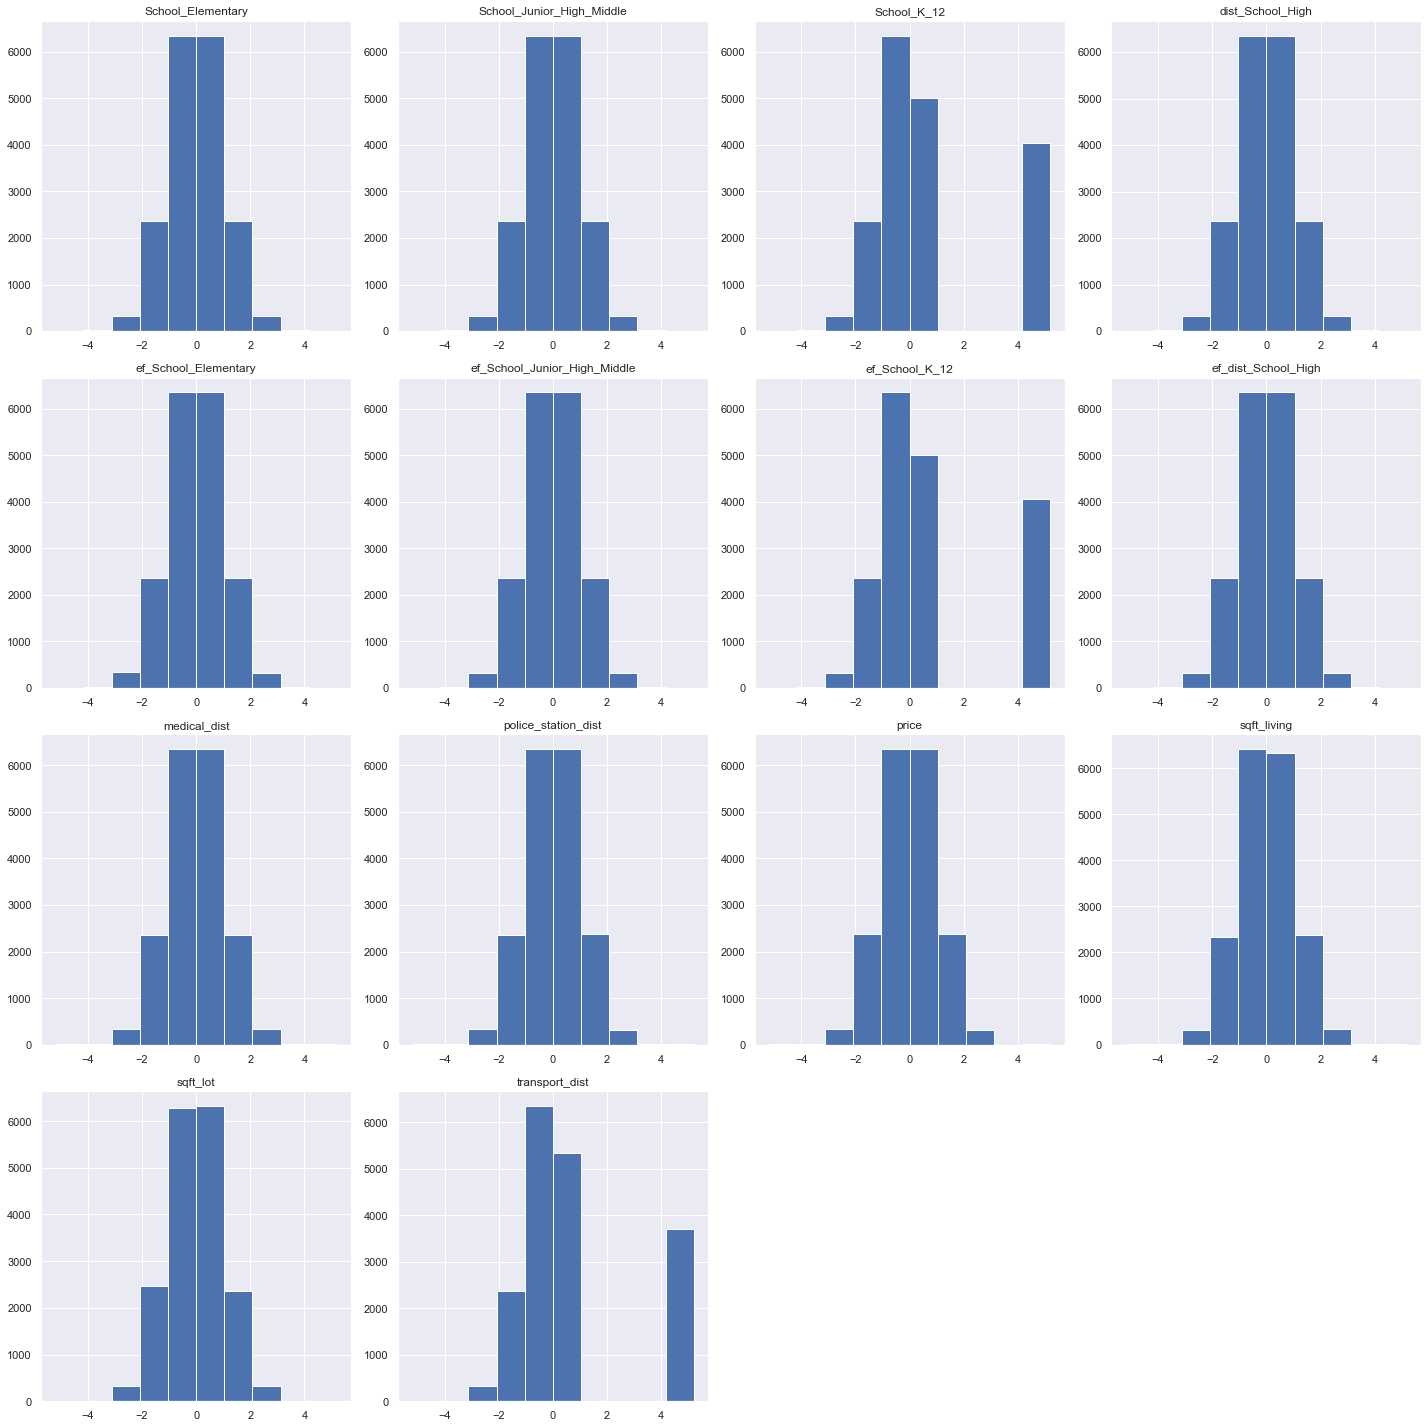

In [59]:
df_cont_quantile.hist(figsize=(20,20))
plt.tight_layout();

In [61]:
df_processed_quantile = pd.concat([df_cont_quantile, grade_dummy, grade_rank_dummy], axis=1)

In [62]:
df_processed_quantile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 29 columns):
price                           18109 non-null float64
School_Elementary               18109 non-null float64
School_K_12                     18109 non-null float64
School_Junior_High_Middle       18109 non-null float64
dist_School_High                18109 non-null float64
ef_School_K_12                  18109 non-null float64
ef_School_Junior_High_Middle    18109 non-null float64
ef_dist_School_High             18109 non-null float64
ef_School_Elementary            18109 non-null float64
police_station_dist             18109 non-null float64
medical_dist                    18109 non-null float64
transport_dist                  18109 non-null float64
sqft_living                     18109 non-null float64
sqft_lot                        18109 non-null float64
grade_4                         18109 non-null uint8
grade_5                         18109 non-null uint8
grade_6        

In [65]:
df_processed_quantile['waterfront'] = df_processed_norm['waterfront']
df_processed_quantile['bathrooms'] = df_processed_norm['bathrooms']

In [66]:
df_processed_quantile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 31 columns):
price                           18109 non-null float64
School_Elementary               18109 non-null float64
School_K_12                     18109 non-null float64
School_Junior_High_Middle       18109 non-null float64
dist_School_High                18109 non-null float64
ef_School_K_12                  18109 non-null float64
ef_School_Junior_High_Middle    18109 non-null float64
ef_dist_School_High             18109 non-null float64
ef_School_Elementary            18109 non-null float64
police_station_dist             18109 non-null float64
medical_dist                    18109 non-null float64
transport_dist                  18109 non-null float64
sqft_living                     18109 non-null float64
sqft_lot                        18109 non-null float64
grade_4                         18109 non-null uint8
grade_5                         18109 non-null uint8
grade_6        

In [67]:
df_processed_quantile.to_csv('df_processed_quantile', index=False)